# Problem: Black Friday Sales Prediction 

**Problem Statement:** To undrstand the customer behaviour of purchase amount against various products of different categories.

**Data Dictionary:**
    
* **User_ID       :-** User ID
* **Product_ID    :-** Product ID
* **Gender        :-** Sex of User
* **Age	          :-** Age in bins
* **Occupation    :-** Occupation (Masked)
* **City_Category :-** Category of the City (A,B,C)
* **Stay_In_Current_City_Years:-**	Number of years stay in current city
* **Marital_Status:-**	Marital Status
* **Product_Category_1:-**	Product Category (Masked)
* **Product_Category_2:-**	Product may belongs to other category also (Masked)
* **Product_Category_3:-**	Product may belongs to other category also (Masked)
* **Purchase :-** Purchase Amount (Target Variable)

## Loading Libraries and Dataset

In [1]:
# importing required libraires
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from math import ceil

from sklearn.metrics import mean_squared_error as MSE

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import os
os.chdir('C:\\Users\\Hp\\Desktop\\Analytics Vidhya Content(Offline Classes)\\EDA (Correlation, NYC, Heart Disease)\\EDA Assignment(Black Friday)\\Black_Friday_Assignment')

In [3]:
# importing our dataset
data = pd.read_csv('train_1.csv')

In [4]:
# checking the shape of the data 
data.shape

(55007, 12)

* There are **55,007 rows** and **12 columns** in our dataset.

## Understanding and Validating Data

In [5]:
# checking the head of the data
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1004808,P00278442,M,36-45,0,A,1,1,11,NaN,NaN,3051
1,1005841,P00350942,F,36-45,7,A,4+,1,3,4.0,5.0,13692
2,1000776,P00117842,F,26-35,3,B,1,0,5,13.0,16.0,8592
3,1001054,P00034642,M,0-17,10,C,1,0,4,5.0,NaN,2761
4,1000937,P00251842,M,26-35,15,A,2,1,1,15.0,16.0,15918


#### Data types:

In [6]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

* **User_ID** should be a category as performing numeric operation over it won't make any sense.
* **Occupation** should be a category.
* **Marital_Status** should be a category.
* **Product Categories** should be a category.

Converting independent variables as category.

In [7]:
for i in data.loc[:,data.columns != 'Purchase'].columns:
    data[i] = data[i].astype('category')

data.dtypes

User_ID                       category
Product_ID                    category
Gender                        category
Age                           category
Occupation                    category
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                category
Product_Category_1            category
Product_Category_2            category
Product_Category_3            category
Purchase                         int64
dtype: object

#### Missing Data

In [8]:
data.isnull().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2            17441
Product_Category_3            38344
Purchase                          0
dtype: int64

* **Product_Category_2** have 17441 missing values.
* **Product_Category_3** have 38344 missing values.

In [9]:
round(data.isnull().sum()/data.shape[0],2)

User_ID                       0.00
Product_ID                    0.00
Gender                        0.00
Age                           0.00
Occupation                    0.00
City_Category                 0.00
Stay_In_Current_City_Years    0.00
Marital_Status                0.00
Product_Category_1            0.00
Product_Category_2            0.32
Product_Category_3            0.70
Purchase                      0.00
dtype: float64

* **Product_Category_2** have 70% missing values.
* **Product_Category_3** have 32% missing values.

#### Data Duplicacy

In [10]:
# Without target variable
data.loc[:,data.columns != 'Purchase'].duplicated().sum()

0

* There are no duplicate values in the data.

### User_ID:

In [11]:
data['User_ID'].value_counts()

1001680    99
1000889    95
1001181    94
1001941    90
1001015    87
           ..
1003468     1
1001310     1
1005579     1
1001276     1
1004712     1
Name: User_ID, Length: 5601, dtype: int64

* There are 5,601 unique users that had purchased products last month.
* Atmost unique customer has bought 99 products last month.

Text(0.5, 1.0, 'Scatterplot for no. of products bought by each customer')

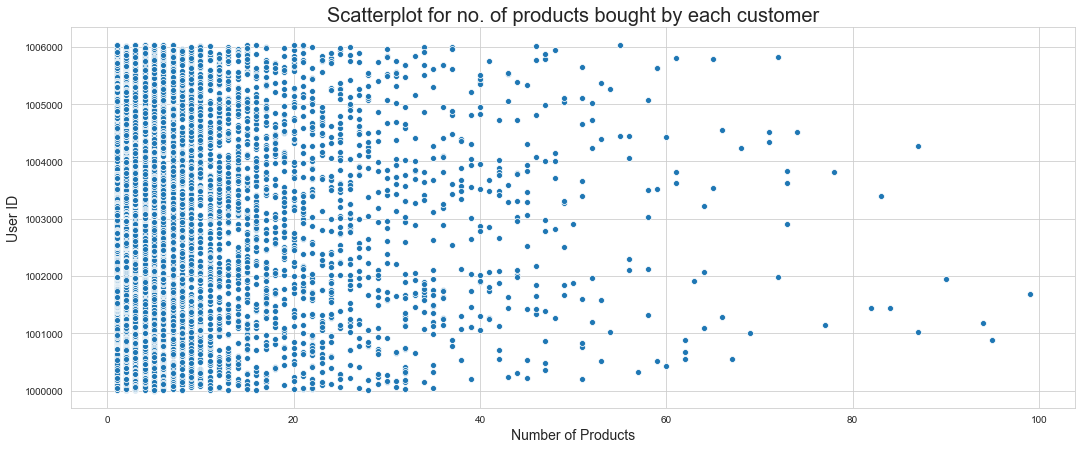

In [12]:
# Creating a new dataframe with unique customer ids and count of transactions
User_count = pd.DataFrame(data['User_ID'].value_counts(ascending=True)).reset_index().rename(columns = {'User_ID':'Count', 'index': 'User_ID'})

# Ploting a scatterplot
plt.figure(figsize=(18,7))
sns.set_style('whitegrid')
sns.scatterplot(x='Count', y='User_ID', data=User_count, ci=None, markers=True)
plt.xlabel('Number of Products', fontsize=14)
plt.ylabel('User ID', fontsize=14)
plt.title('Scatterplot for no. of products bought by each customer', fontsize=20)

* Majority of customers have bought between 0 to 25 products.

**To check:**
Do people that buy more products relatively have lower purchase amount?

**What is the number of products bought by top 10 customers?**

Text(0, 0.5, 'Number of Products')

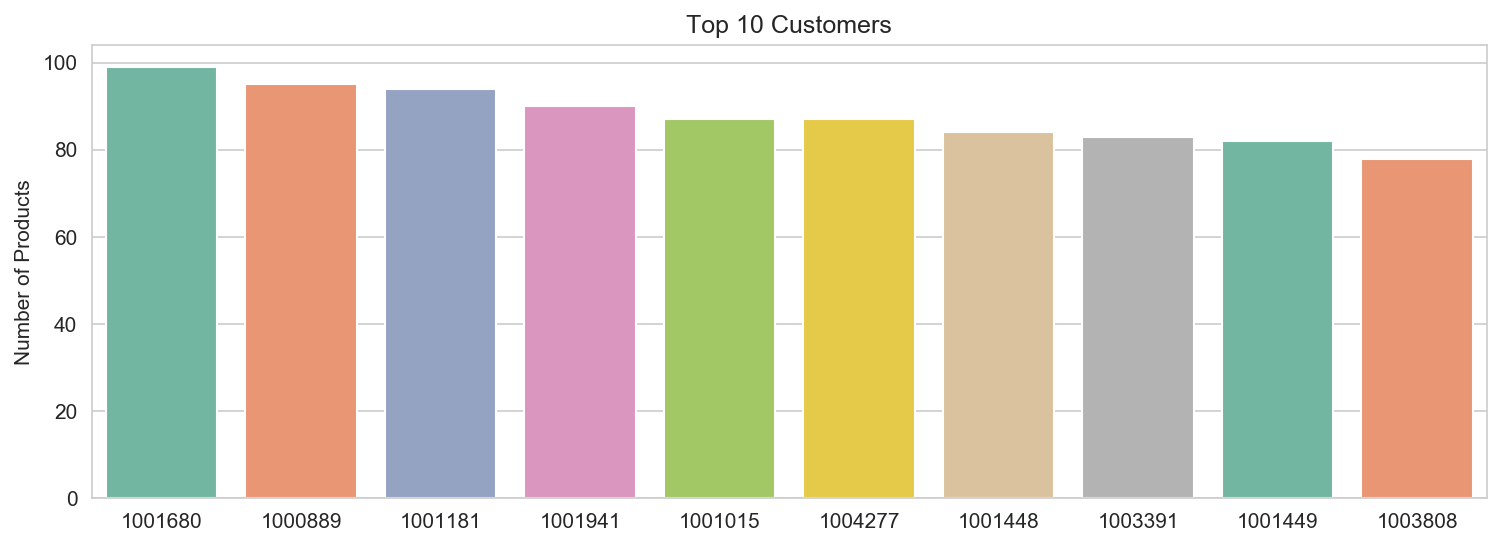

In [13]:
plt.figure(figsize=(12,4), dpi=150)
sns.barplot(x= data['User_ID'].value_counts(sort=True)[:10].index, y=data['User_ID'].value_counts(sort=True)[:10],order=data['User_ID'].value_counts(sort=True)[:10].index, palette='Set2')
plt.title('Top 10 Customers')
plt.ylabel('Number of Products')

### Product ID:

In [14]:
# Checking unique product ids
data['Product_ID'].value_counts()

P00265242    180
P00110742    171
P00025442    167
P00255842    157
P00145042    150
            ... 
P00038142      1
P00142242      1
P00141342      1
P00141142      1
P00134242      1
Name: Product_ID, Length: 3149, dtype: int64

* There are 3,631 unique products.
* P00265242 is the most sold product and sold 180 units last month.
* There are few product that had been sold only once that signifies not every customer buy every product available at the store.

Text(0.5, 1.0, 'Scatterplot for count of unique products sold')

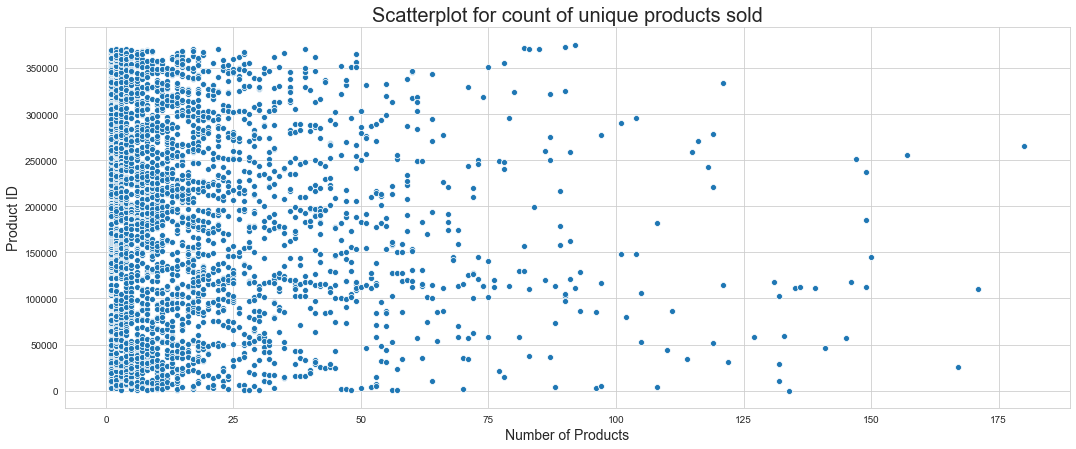

In [15]:
# Creating a new dataframe with unique customer ids and count of transactions
Product_count = pd.DataFrame(data['Product_ID'].value_counts(ascending=True)).reset_index().rename(columns = {'Product_ID':'Count', 'index': 'Product_ID'})
Product_Id = Product_count['Product_ID'].str.split('P').apply(lambda x:x[1]).astype(int)
# Ploting a scatterplot
plt.figure(figsize=(18,7))
sns.set_style('whitegrid')
sns.scatterplot(x= Product_count['Count'], y= Product_Id, ci=None)
plt.xlabel('Number of Products', fontsize=14)
plt.ylabel('Product ID', fontsize=14)
plt.title('Scatterplot for count of unique products sold', fontsize=20)

* Majority of products have sold units between 1-25. 
* There are very few products that sold more than 100 units last month.

**To Check:** Do the products that sold more than 100 units have lower purchase amount?

**What are the top 10 products that sold throught-out the stores?** 

Text(0, 0.5, 'Number of Products')

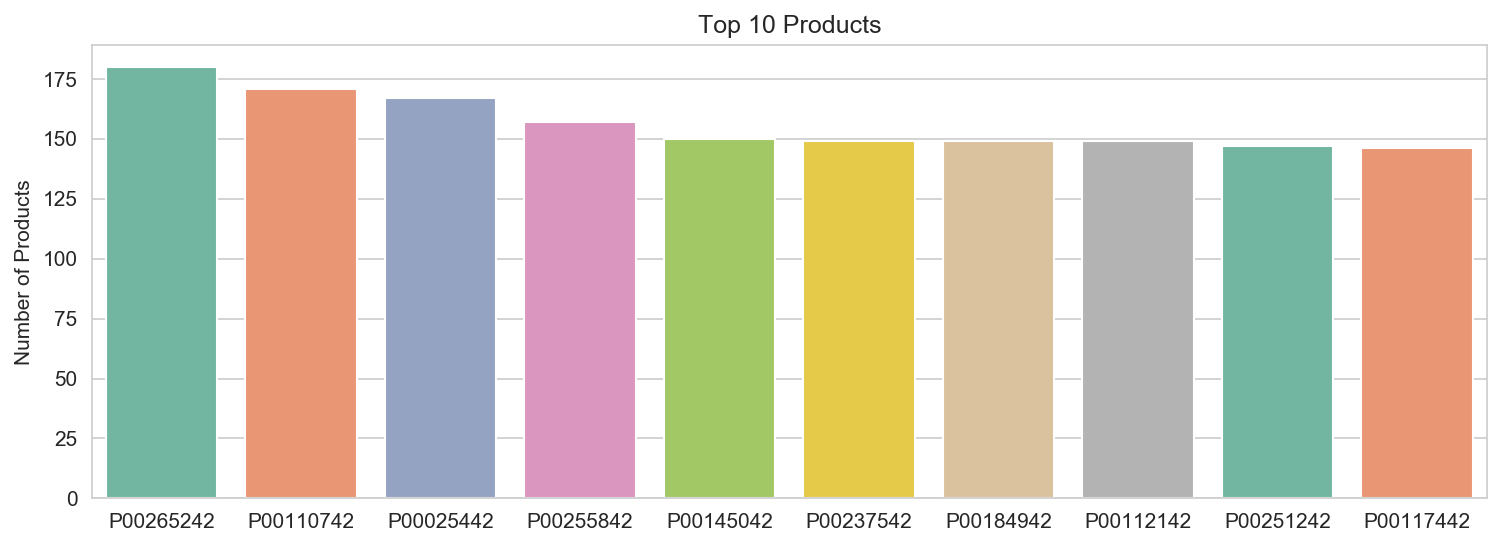

In [16]:
plt.figure(figsize=(12,4), dpi=150)
sns.barplot(x= data['Product_ID'].value_counts(sort=True)[:10].index, y=data['Product_ID'].value_counts(sort=True)[:10],order=data['Product_ID'].value_counts(sort=True)[:10].index, palette='Set2')
plt.title('Top 10 Products')
plt.ylabel('Number of Products')

**Checking the dataset for most sold product**

In [17]:
data_sub = data[data['Product_ID'] == 'P00265242']
data_sub.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
146,1001418,P00265242,M,18-25,4,A,1,1,5,8.0,NaN,6971
738,1001876,P00265242,M,26-35,12,C,1,0,5,8.0,NaN,8768
850,1004676,P00265242,M,46-50,14,C,2,1,5,8.0,NaN,3696
1419,1002772,P00265242,M,36-45,17,A,3,1,5,8.0,NaN,3633
2195,1004307,P00265242,M,26-35,0,B,1,0,5,8.0,NaN,8637


**Checking discriptive statistics of the target variable**

In [18]:
data_sub['Purchase'].describe()

count     180.000000
mean     7442.811111
std      1909.099743
min      1720.000000
25%      6951.000000
50%      8617.500000
75%      8767.250000
max      8906.000000
Name: Purchase, dtype: float64

Having same product id, there is alot of deviation in the purchase amount of this product.
<br>
Different stores may have different prices for the same product but not with this large of a difference.
<br>
Also, this data is only of one month. Could this signifies that this purchase variable is not for a 
<br>
single unit bought by the customer. But, the price is based on the unit bought of the same product id 
<br>
by a single customer.
<br>
<br>
Need to check this properly in Bi-variate Analysis.

**Defining Functions:**

In [19]:
def Category_plot(column, data):
    """
    Function to plot countplot and pie chart for categorical variables.
    
    """
    # Setting the figure size
    plt.figure(figsize=(10,4), dpi=150)
    
    
    # ploting the barplot
    plt.subplot(1,2,1)
    g=sns.countplot(x=column, data= data, palette='Set2')
    
    #ploting the pie chart 
    plt.subplot(1,2,2)
    plt.axis('equal')
    
    plt.pie(x= data[column].value_counts(), labels= data[column].value_counts().index, autopct='%0.1f%%', shadow=True)
    plt.show()
    
#------------------------------------------------------------------------------------------------------------------------------#
#---------------------------------------------------------Function 2-----------------------------------------------------------#
#------------------------------------------------------------------------------------------------------------------------------#

def Uni_Users(column, data):
    """
    Function to create a dataframe for unique customer id wrt other 
    categorical variables and count of items purchased by individual customer.
    
    """
    Uni_Users_ = pd.DataFrame(data.groupby(['User_ID', column])['Purchase'].count()).reset_index() .rename(columns={'Purchase':'Items_purchased'})
    Uni_Users_ = Uni_Users_[Uni_Users_['Items_purchased'] != 0]
    
    return Uni_Users_

#------------------------------------------------------------------------------------------------------------------------------#
#---------------------------------------------------------Function 3-----------------------------------------------------------#
#------------------------------------------------------------------------------------------------------------------------------#

def Barplots(column, data):
    """
    Function 2 plot barplots for the different categories. 
    First barplot is for the number of products sold by category
    Second barplot is for the number of customer who bought any product by category
    
    """
    
    # Setting the figure size
    plt.figure(figsize=(20,10))

    # Barplot for each product sold
    plt.subplot(1,2,1)
    g = sns.countplot(y=data[column], order= data[column].value_counts().index, palette='Paired')
    for i in g.patches:
        g.annotate(s='{:.0f}'.format(i.get_width()), xy=(i.get_width()+0.2, i.get_y()+0.6))
    plt.ylabel(data[column].name,fontsize=14)
    plt.title('Number of products sold', fontsize=20)
    
    # Barplot for individual customer
    Uni_Users_Occ = Uni_Users(column, data)
    plt.subplot(1,2,2)
    g = sns.countplot(y=Uni_Users_Occ[column], order= data[column].value_counts().index, palette='Paired')
    for i in g.patches:
        g.annotate(s='{:.0f}'.format(i.get_width()), xy=(i.get_width()+0.2, i.get_y()+0.6))
    plt.ylabel(data[column].name,fontsize=14)
    plt.title('Number of unique customers that made payment', fontsize=20)
    
    plt.show()
    

### Gender

In [20]:
# Checking unique values
data['Gender'].unique()

[M, F]
Categories (2, object): [M, F]

* There are only 2 categories (M and F) in this columns.

### Products solds by Gender 

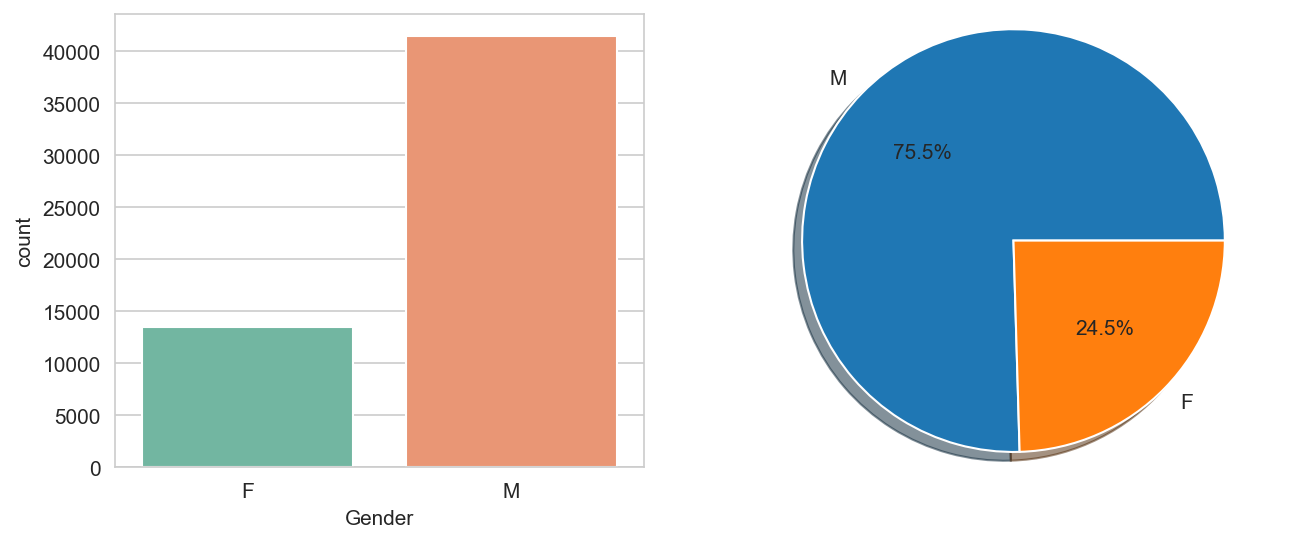

In [21]:
Category_plot('Gender', data)

* Approximately, Males bought 75% of the products last month.
* Female bought only 25% of products.

**Note:** This graph only shows the percent of products bought by each gender.
          
   **But,what is the actual number of males and females that who made any purchase last month?**

### Unique Customers by Gender

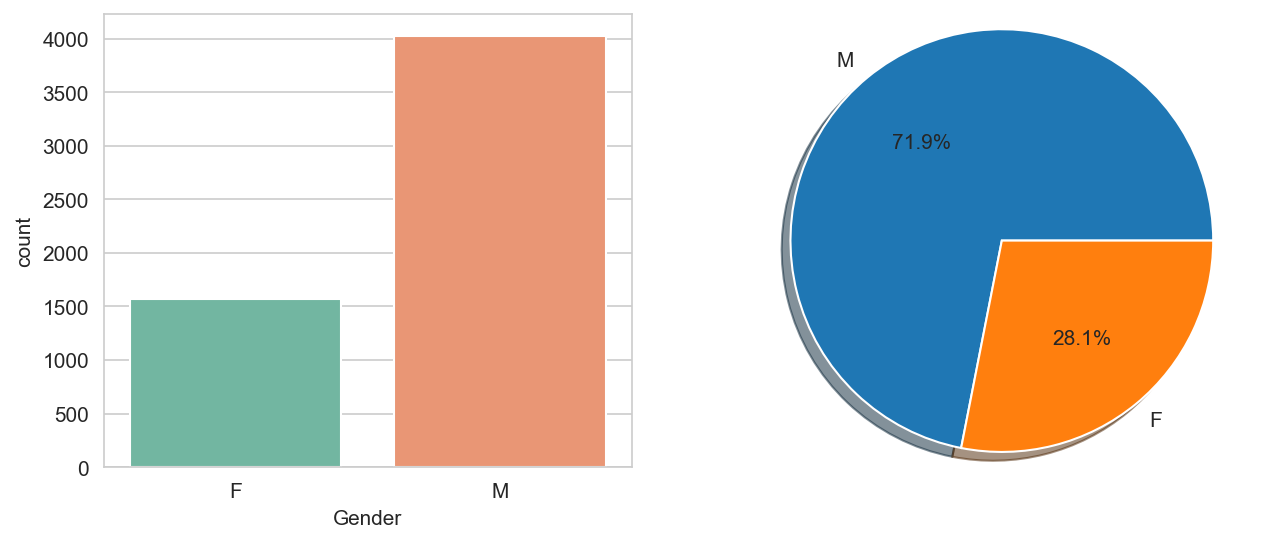

In [22]:
Uni_Users_Gen = Uni_Users('Gender', data)
Category_plot('Gender', Uni_Users_Gen)

* Approximately, 72% males made transactions but only 28% females made any transactions last year. 


**Checking the ratio of number of products bought to the unique customers transactions for each gender.**

In [23]:
data['Gender'].value_counts()/Uni_Users_Gen['Gender'].value_counts()

M    10.305611
F     8.579784
Name: Gender, dtype: float64

* Males tends to buy more products than female counterparts.

### Age

In [24]:
# checking the unique ages 
data['Age'].unique()

[36-45, 26-35, 0-17, 51-55, 18-25, 55+, 46-50]
Categories (7, object): [36-45, 26-35, 0-17, 51-55, 18-25, 55+, 46-50]

* The age variable is divied into 7 bins.

### Products Sold by Age

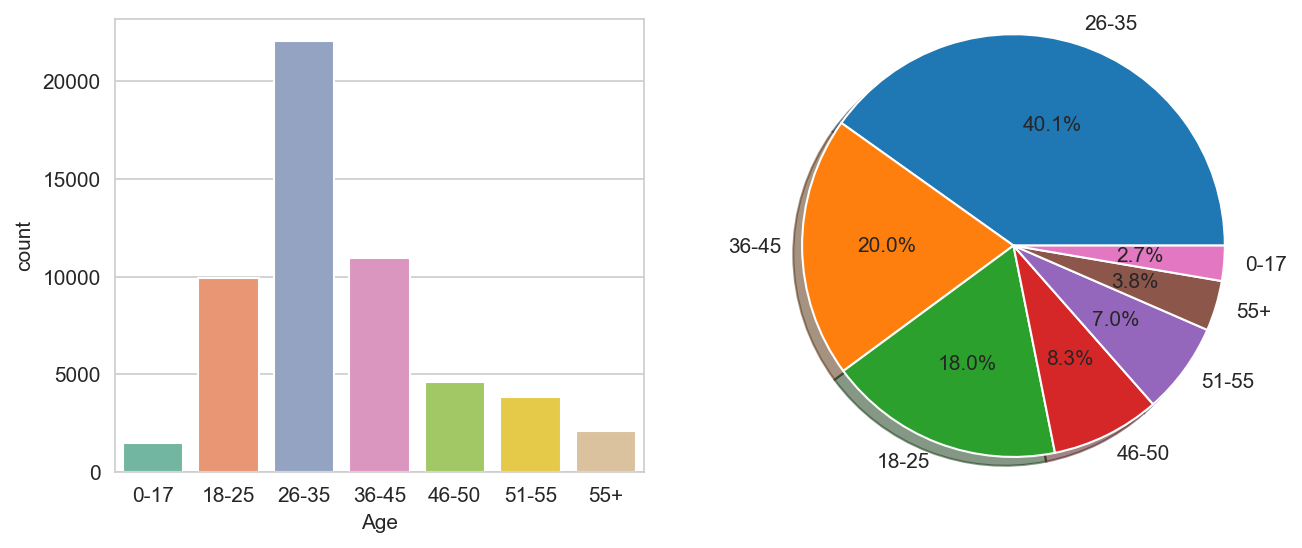

In [25]:
Category_plot('Age', data)

* Ages between 26-35 bought 40% of the products sold last month.
* Ages below 18 and above 55 didn't bought many products last month.
* Age bracket 18-35 i.e majorly the working class bought aprroximatly 78% of the products last month.


**1. What is the percentage of young and older individuals who had made any purchase in the store?**
<br>
**2. Do 18-35 age bracket people only buy more products or they also visit the stores more?**

### Unique Customers by Age

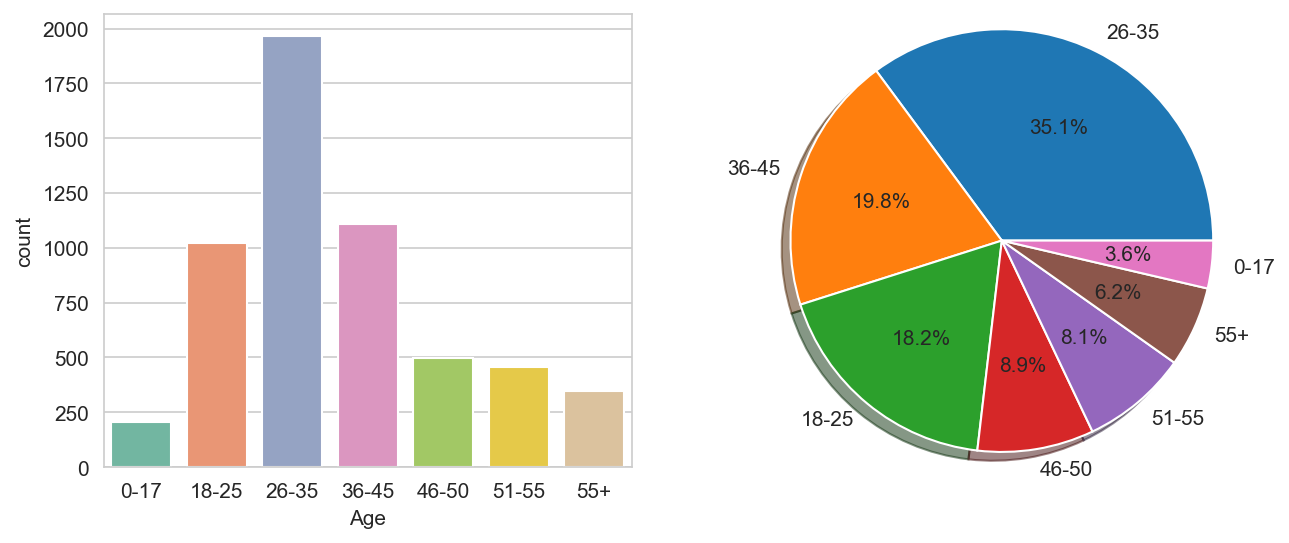

In [26]:
Uni_Users_Age = Uni_Users('Age', data)
Category_plot('Age', Uni_Users_Age)

* For Ages below 18 and above 55:
    - 10% of the customers that made any transaction lies in these brackets.
    - But, only 5.5% products are bought by these brackets.
    - We can conclude, Young and old individuals tends to make transaction but buy less number of items comparitivly.
* For Ages between 18-35:
    - 73% of the customers that made any transaction lies in this age group.
    - 78% products are about by these groups.
    - We can conclude, Middle aged people make majority of transactions and buy majority of products.

**To check:** Do these middle aged prople also have high checkout amounts?

### Occupation

In [27]:
# checking unique values in occupation variable 
print('Number of unique values:',data['Occupation'].nunique(),'\nValues:',data['Occupation'].unique())

Number of unique values: 21 
Values: [0, 7, 3, 10, 15, ..., 19, 11, 13, 18, 8]
Length: 21
Categories (21, int64): [0, 7, 3, 10, ..., 11, 13, 18, 8]


* There 21 unique values in Occupation variable.
* Values ranges from 0-20.

### Products Sold Vs Customer Transacted

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]),
 <a list of 9 Text yticklabel objects>)

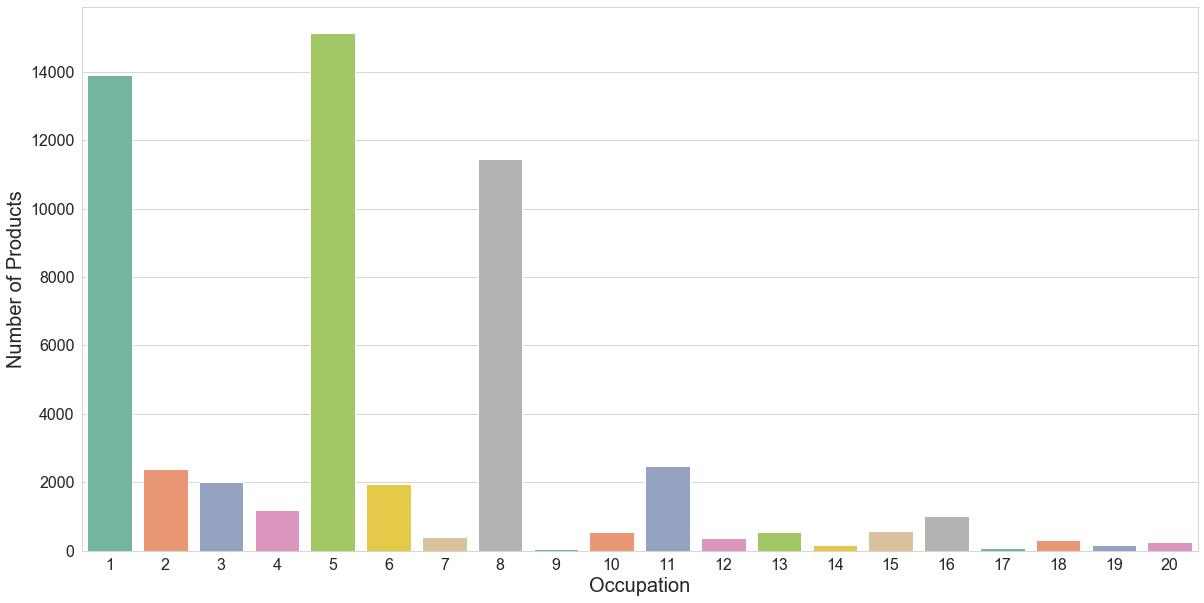

In [28]:
plt.figure(figsize=(20,10))

    # Barplot for each product sold
    
g = sns.countplot(x=data['Product_Category_1'],  palette='Set2')
    #for i in g.patches:
    #    g.annotate(s='{:.0f}'.format(i.get_width()), xy=(i.get_width()+0.2, i.get_y()+0.6))
plt.ylabel('Number of Products',fontsize=20)
plt.xlabel('Occupation', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

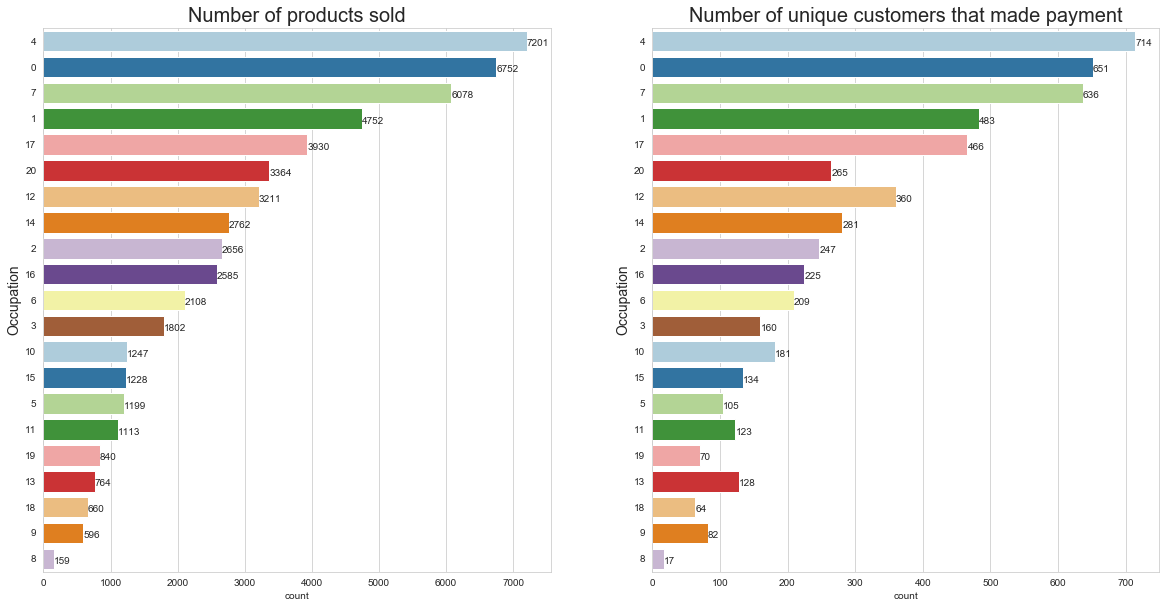

In [29]:
Barplots('Occupation', data)

* Customers having occupation 4 visited and bought highest number of products. 
* Customers having occupation 8 visited and bought least number of products.
* For some occupations like 20 and 3, No. of people visited tends to be lower but they bought more number of products comparatively.
* For some occupations like 10 and 13, No. of people visited tends to be higher but they bought less number of products comparatively.

### City_Category:

In [30]:
data['City_Category'].unique()

[A, B, C]
Categories (3, object): [A, B, C]

* There are 3 cities A, B and C in which stores are available.

### Products Sold by City

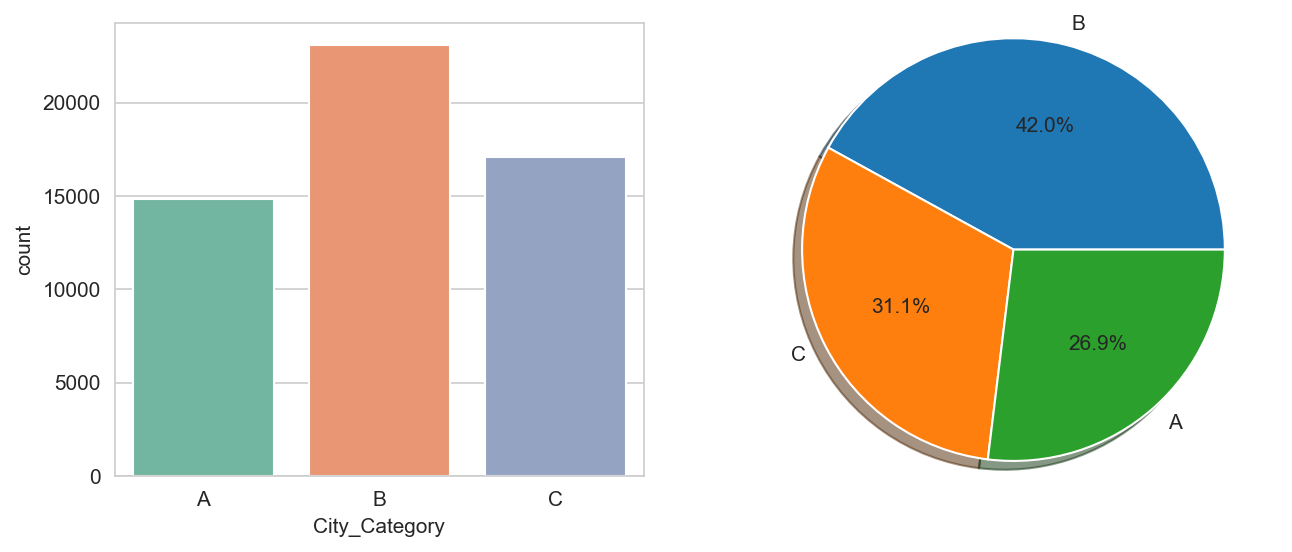

In [31]:
Category_plot('City_Category', data)

* City B sold most products last month.
* City A sold least products last month.

### Unique Customers by City

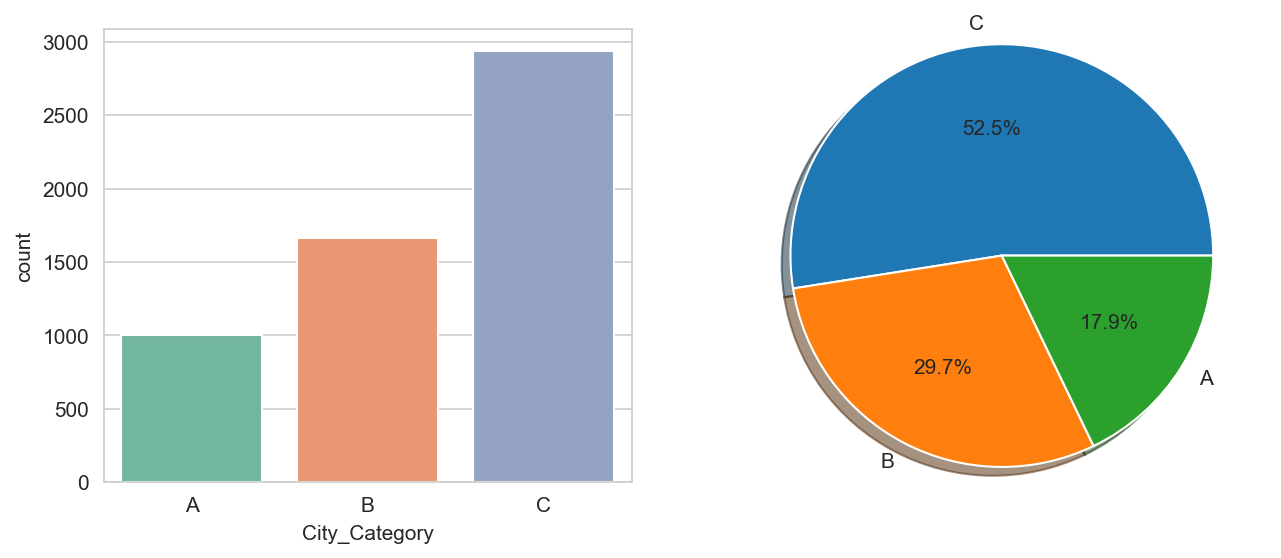

In [32]:
Uni_Users_City = Uni_Users('City_Category', data)
Category_plot('City_Category', Uni_Users_City)

* City C has the most customers that made any transaction last month.
* City A has the least customers that made any transaction last month.


### Products Sold Vs Customer Transacted

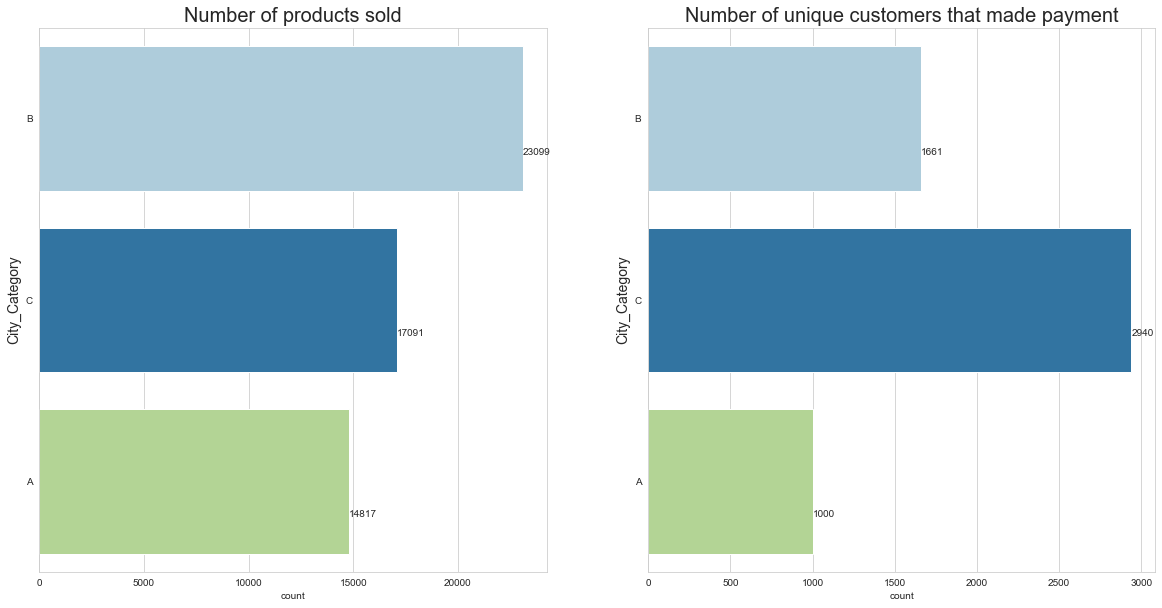

In [33]:
Barplots('City_Category', data)

* Number of unique customers for city B is less but they bought more products.
* Number of unique customers for city C is very high but they bought products in less quantity.


**Do all the products were sold in each city?**

In [34]:
pd.crosstab(data['Product_ID'], data['City_Category']).sort_values(by='A').head(10)

City_Category,A,B,C
Product_ID,,,
P00089842,0,0,1
P00215342,0,1,0
P00357542,0,0,1
P00320542,0,2,2
P00357442,0,1,1
P00147842,0,2,1
P00338942,0,1,0
P00217642,0,0,1
P00146942,0,1,1


* No, not every product is sold in each city.

**How many unique products are sold in each city?**

In [35]:
Uni_Product_City = pd.DataFrame(data.groupby(['City_Category','Product_ID'])['Purchase'].count()).reset_index()
Uni_Product_City[Uni_Product_City['Purchase'] != 0]['City_Category'].value_counts()

B    2785
A    2646
C    2421
Name: City_Category, dtype: int64

* City B sold most unique products followed by City A.

### Stay_In_Current_City_Years:

In [36]:
data['Stay_In_Current_City_Years'].unique()

[1, 4+, 2, 0, 3]
Categories (5, object): [1, 4+, 2, 0, 3]

* Custumer stay in current city is between 0 to 4+ years.

### Product Solds by No. of Years Stay in Current City

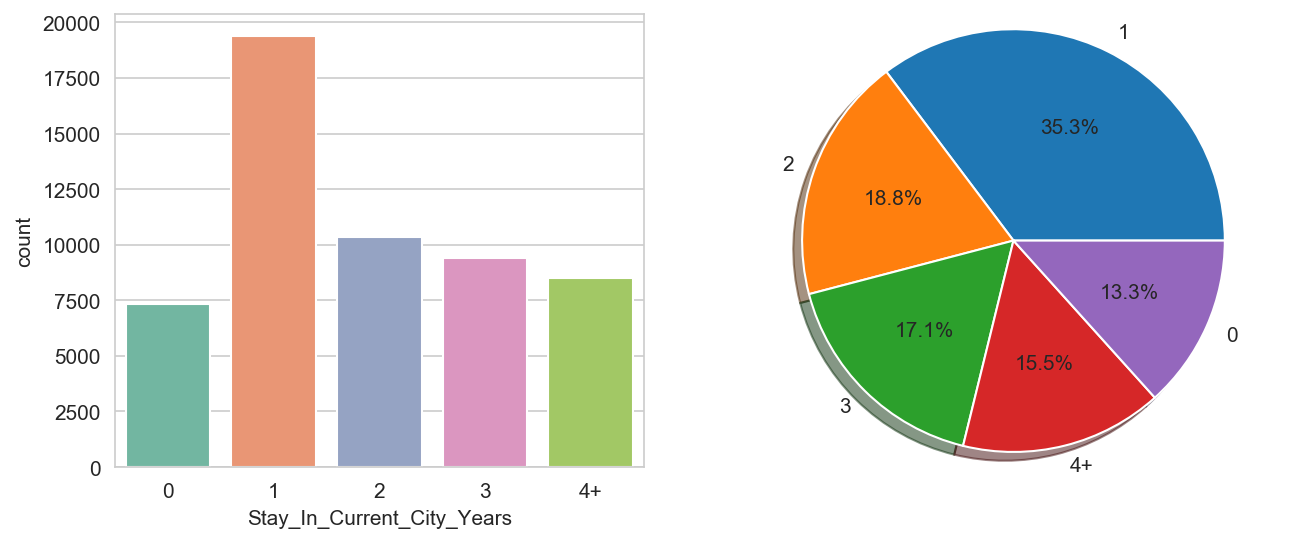

In [37]:
Category_plot('Stay_In_Current_City_Years', data)

* If the customer had stayed for 1 year in the current city they bought 35% of the product sold last month.
* For other years it is between 13 to 19%.

### Unique Customers by No. of Years Stay in Current City

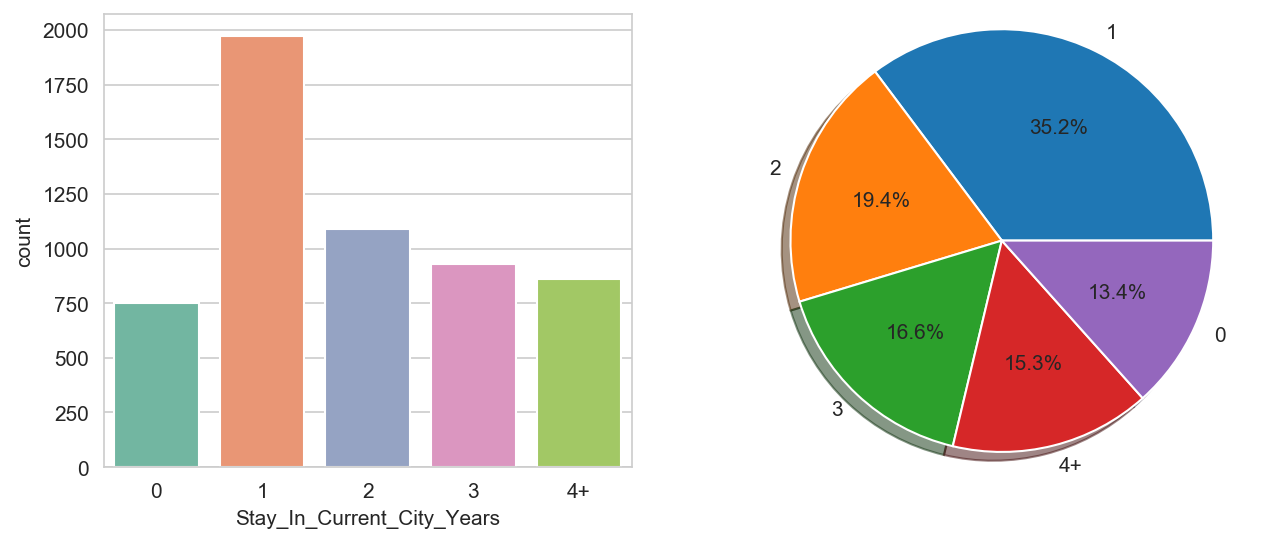

In [38]:
Uni_Users_Years = Uni_Users('Stay_In_Current_City_Years', data)
Category_plot('Stay_In_Current_City_Years', Uni_Users_Years)

* Unique customers follows the same trend as Product sold.

### Marital_Status:

In [39]:
data['Marital_Status'].unique()

[1, 0]
Categories (2, int64): [1, 0]

* There are 2 categories 0,1 for marital status variable.
* Possibly 0 signifies unmarried and 1 signifies married but there is no confirmation.

### Product Sold by Marital Status

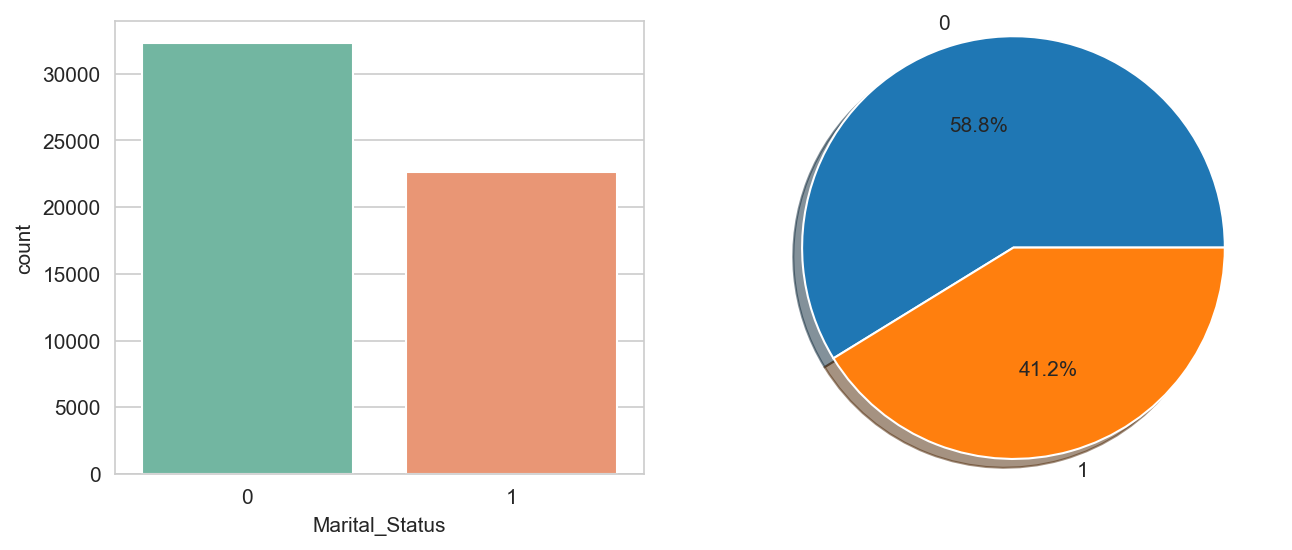

In [40]:
Category_plot('Marital_Status', data)

* People with marital status as 0 bought 58.8% of products in last month. 
* People with marital status as 1 bought 41.2% of products in last month.

### Unique Customers by Marital Status

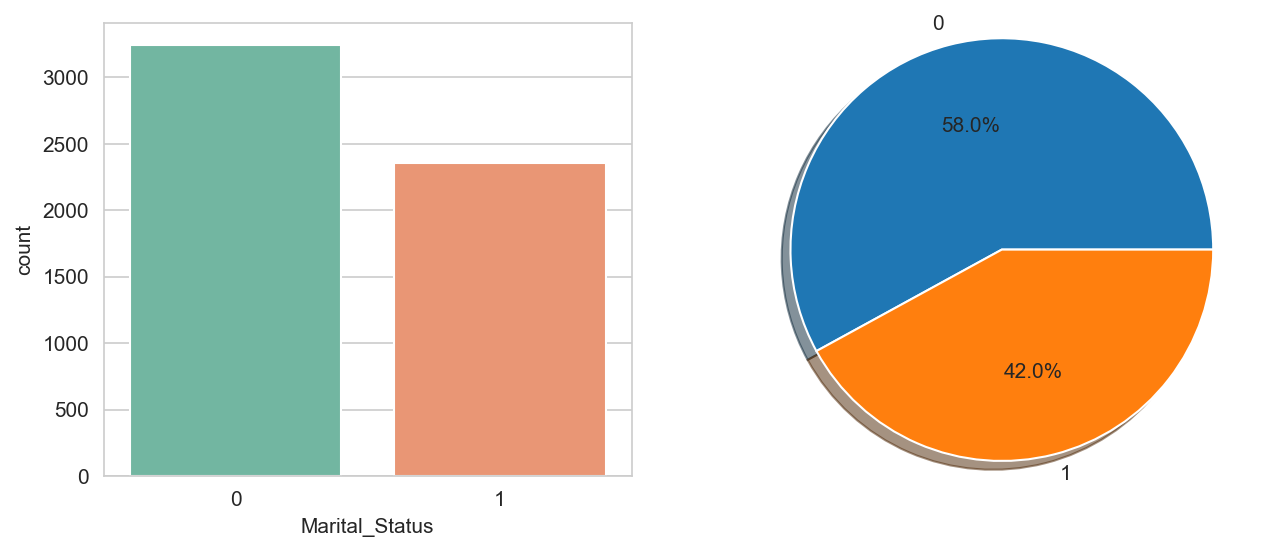

In [41]:
Uni_Users_Mar = Uni_Users('Marital_Status', data)
Category_plot('Marital_Status', Uni_Users_Mar)

* Unique Customers follows the same trend as Products sold.

### Product_Category:

In [42]:
data[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].isnull().sum()/data.shape[0]

Product_Category_1    0.000000
Product_Category_2    0.317069
Product_Category_3    0.697075
dtype: float64

In the dataset we have three variables for Product Category. The first product category tell us about the base category of the products and the rest 2 are for those products which could be categorize in more than 1 category. 
<br>
<br>
That's why there is missing values for category 2 and category 3.

**Checking unique values for all 3 category variables.**

In [43]:
for i in data.columns[8:11]:
    a = list(data[i].unique())
    b = data[i].nunique()
    a.sort()
    print('Number of unique categories for\033[1m {}\033[0m: {}'.format(i,b))
    print('Unique categories for\033[1m {}\033[0m: {}\n'.format(i, a))                                            

Number of unique categories for Product_Category_1: 20
Unique categories for Product_Category_1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

Number of unique categories for Product_Category_2: 17
Unique categories for Product_Category_2: [nan, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]

Number of unique categories for Product_Category_3: 15
Unique categories for Product_Category_3: [nan, 3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]



* Product_Category_1 ranges from 1-20 category numbers.
* Product_Category_2 doesn't have 1, 19 and 20 category numbers.
* Product_Category_3 doesn't have 1, 2, 7, 19 and 20 category numbers.

In [44]:
# Stacking all 3 Product categories on each other to create a new dataframe
category_all = pd.DataFrame(data[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].stack(dropna=True)).reset_index()
category_all.drop('level_0', inplace=True, axis=1)
category_all = category_all.rename(columns = {'level_1': 'Category_Number', 0:'Category'})
category_all.head()

,Category_Number,Category
0,Product_Category_1,11
1,Product_Category_1,3
2,Product_Category_2,4
3,Product_Category_3,5
4,Product_Category_1,5


In [45]:
category_all.shape

(109236, 2)

* After stacking all the product categories we got 1,09,236 rows for category

Text(0.5, 1.0, 'Number of Products Sold by Category')

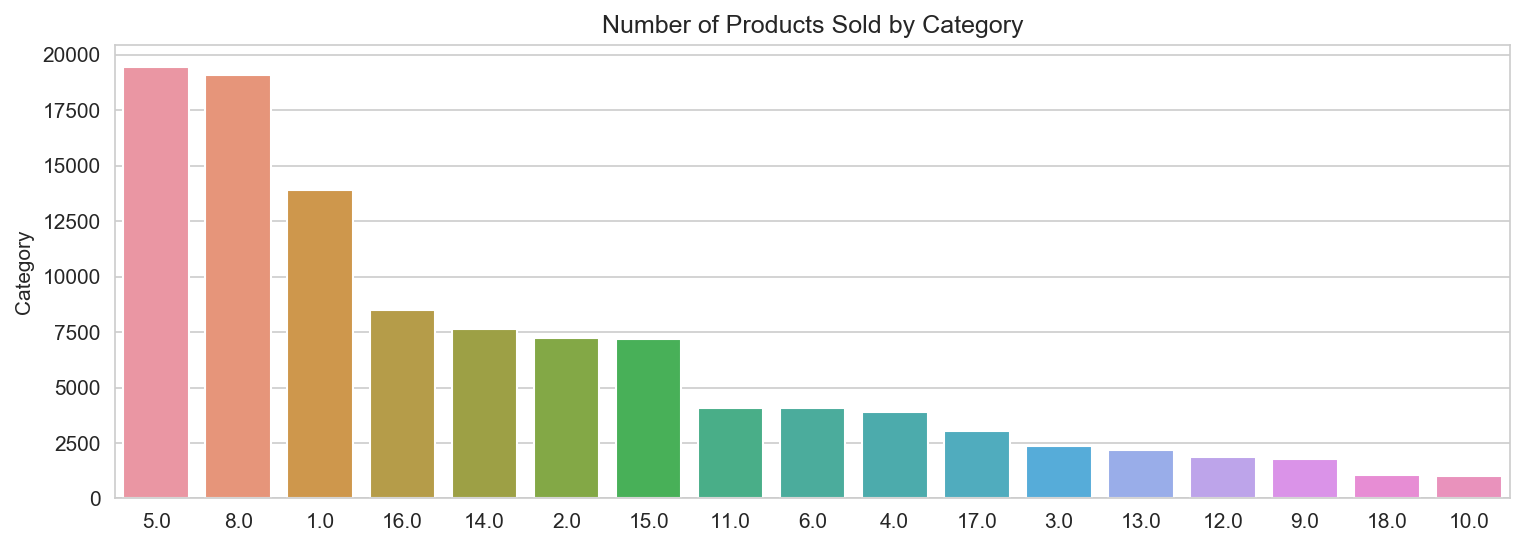

In [46]:
plt.figure(figsize=(12,4), dpi=150)
sns.barplot(x= category_all['Category'].value_counts(sort=True)[:10].index, y=category_all['Category'].value_counts(sort=True)[:10],order=category_all['Category'].value_counts(sort=True)[:10].index)
plt.title('Number of Products Sold by Category')

* Products with category 5 and 8 sold most last month.
* Products with category 18 and 10 sold least last month.


**To check:** Does product categories that sold more products have lower checkput amount? 

### Purchase (Target):

In [47]:
data['Purchase'].dtype

dtype('int64')

In [48]:
data['Purchase'].describe()

count    55007.000000
mean      9216.613995
std       5025.948924
min         12.000000
25%       5475.000000
50%       8035.000000
75%      12019.000000
max      23960.000000
Name: Purchase, dtype: float64

In [49]:
# Calculating descriptive statistics of the target 

def Kde_Plot(col, data):
    
    size= len(col)
    plt.figure(figsize=(18,8), dpi=100)
    
    for j,i in enumerate(col):
        
        avg = data[i].mean()
        med = data[i].median()
        st_dev = data[i].std()
        kurt = data[i].kurtosis()
        skew = data[i].skew()
        min_p = data[i].min()
        max_p = data[i].max()
        
        # Points of standerd daviation
        points = avg-st_dev, avg+st_dev
        
        # Ploting kernal density plot
        
        plt.subplot(ceil(size/2),ceil(size/2),j+1)
        sns.kdeplot(data[i], shade=True)
        sns.scatterplot(avg,[0],color='blue',label='mean')
        sns.scatterplot(med,[0],color='green',label='median')
        sns.lineplot(points,[0,0],color='black', label='st_dev')
        sns.scatterplot(min_p,[0],color='red',label='min purchase')
        sns.scatterplot(max_p,[0],color='red',label='max purchase')
        plt.xlabel(i, fontsize=16)
        plt.ylabel('Frequency', fontsize=14)
        plt.title('\tstd_dev: {}   \tkurtosis: {}   \tskewness: {}   \tmean: {}\n\tmedian: {}   \tmin: {}   \tmax: {}'.format(round(st_dev,2),
                                                                                                            round(kurt,2),
                                                                                                            round(skew,2),
                                                                                                            round(avg,2),
                                                                                                            round(med,2),
                                                                                                            min_p, max_p), fontsize=15-size)
        plt.tight_layout()
    plt.show()

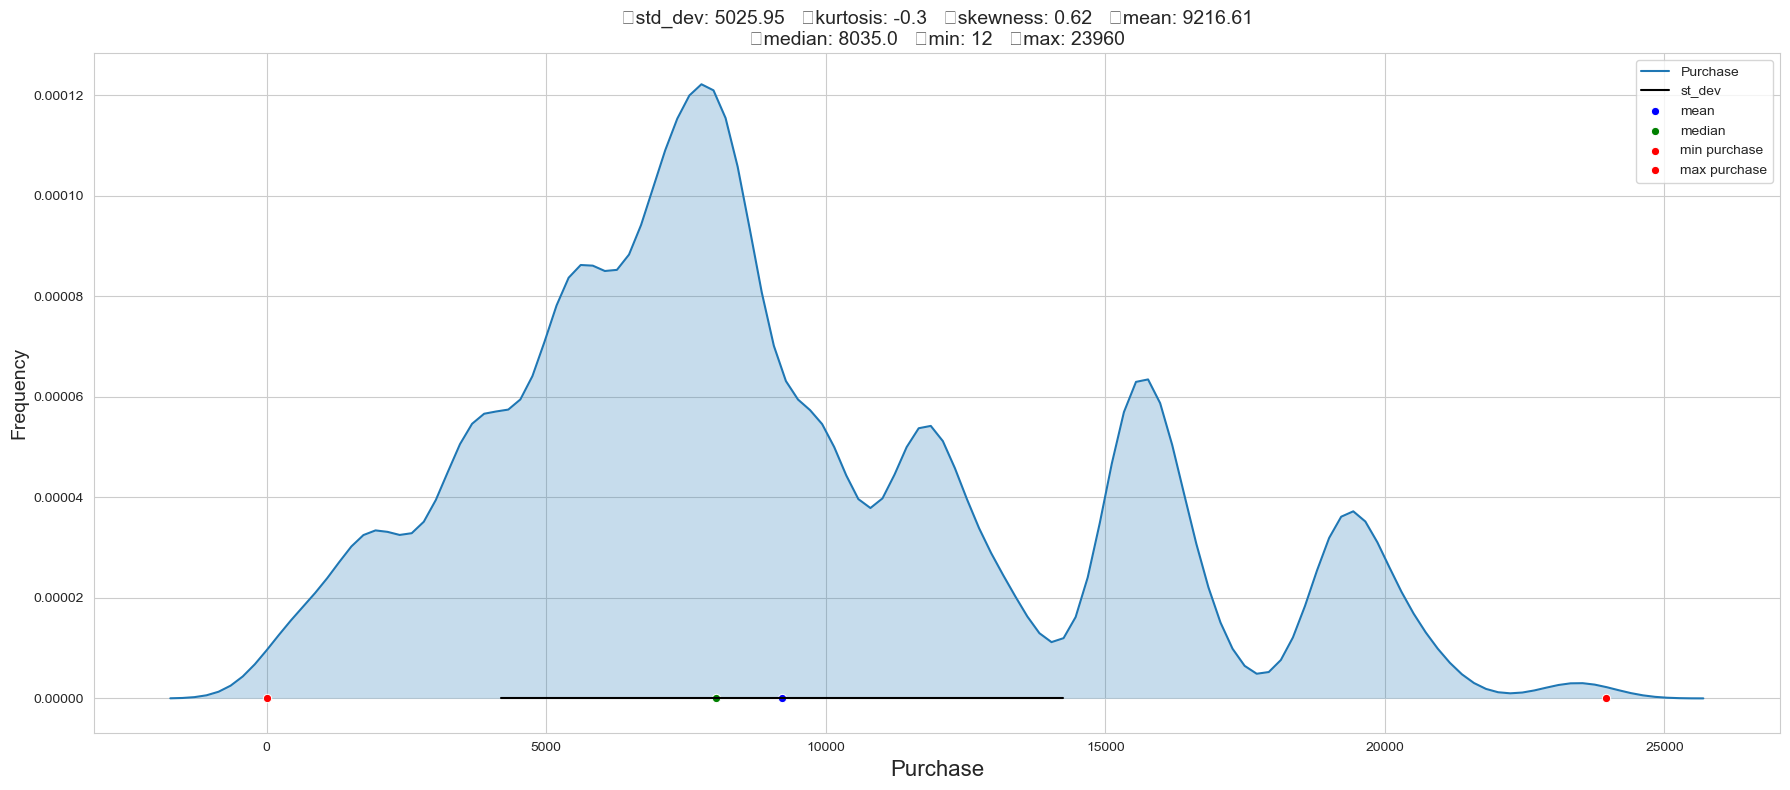

In [50]:
Kde_Plot(['Purchase'], data)

* Lowest purchase amount is 12.
* Highest purchase amount is 25000.
* Kurtosis is -0.3, which signifies the plot is slightly platykurtic i.e. the tails are a bot flater comparitivly to a normal distribution. 
* Skewness is 0.62, which signifies the plot is a bit positivly skewed.
* Mean is greater than median, this also signifies positive skewness.
* Standerd daviation is very high signifies the data is spread out from the mean. 

**To Check:** Which product id and categories have low and high purchase amount?

**Tranforming Purchase variable towards Normal Distribution**

In [51]:
#Log Transformation 
data['Purchase_log'] = np.log(100 +data['Purchase'])

#Box Cox Transformation
purchase = np.array(data['Purchase'])
l, opt_lambda = stats.boxcox(purchase)
data['Purchase_boxcox'] = stats.boxcox(100 + data['Purchase'], lmbda=opt_lambda)

#Square-root Transformation
data['Purchase_root'] = np.sqrt(data['Purchase'])

#Reciprocal Transformation
data['Purchase_reciprocal'] = 1/data['Purchase']
 

data[data.columns[11:]].head()

,Purchase,Purchase_log,Purchase_boxcox,Purchase_root,Purchase_reciprocal
0,3051,8.055475,153.607232,55.235858,0.000328
1,13692,9.531844,349.725959,117.012820,0.000073
2,8592,9.070158,270.535764,92.693042,0.000116
3,2761,7.958926,145.529185,52.545219,0.000362
4,15918,9.681468,380.041125,126.166557,0.000063


**Ploting Transformed Purchase Columns** 

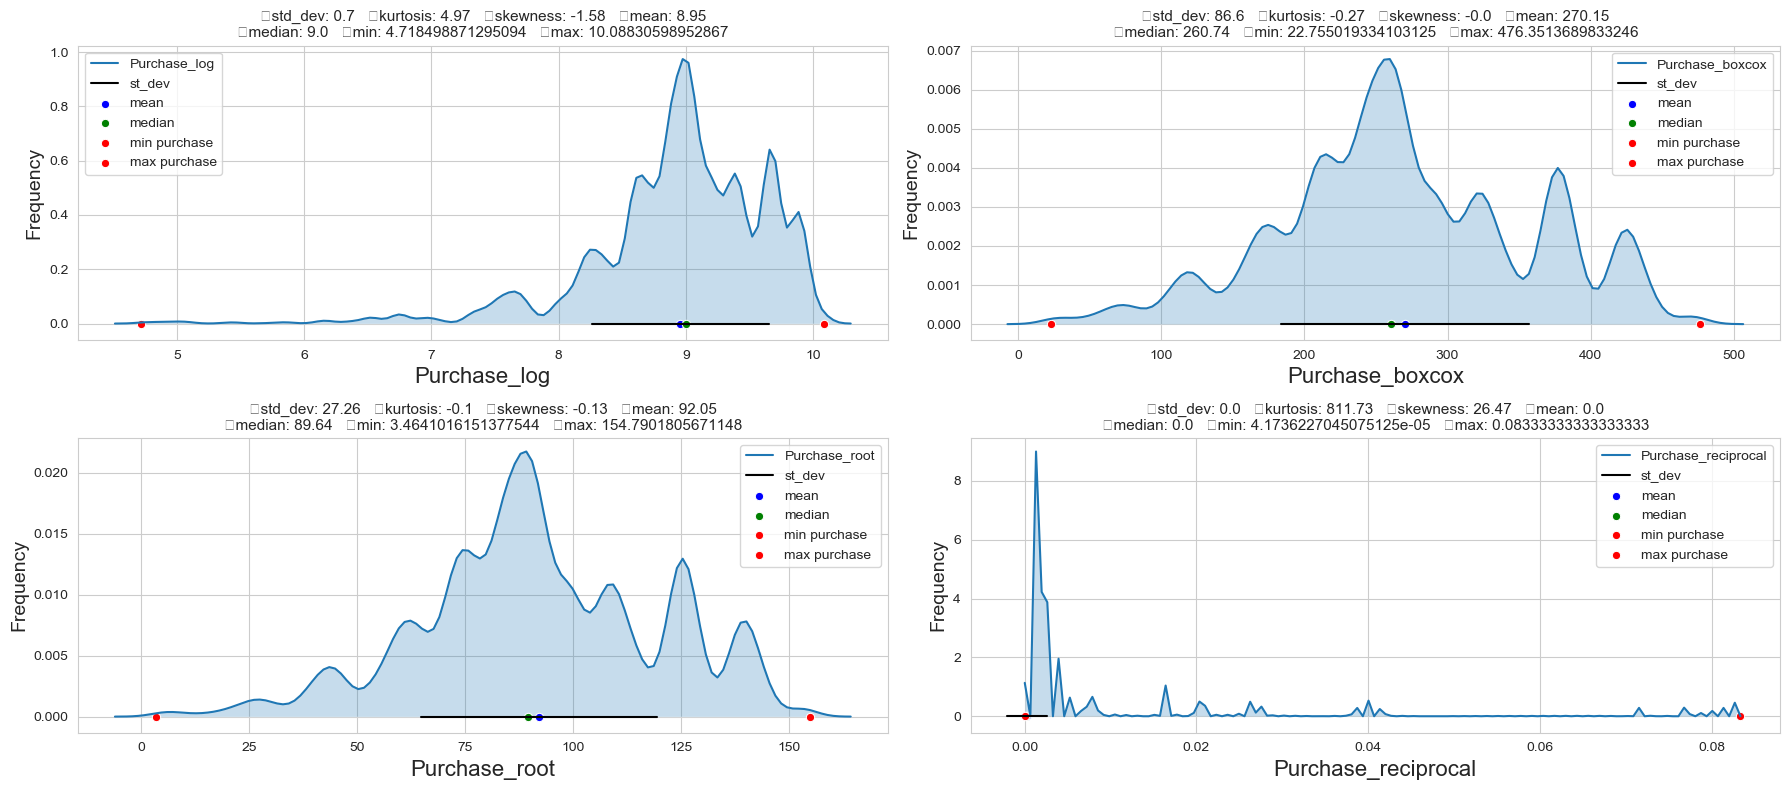

In [52]:
col = ['Purchase_log', 'Purchase_boxcox', 'Purchase_root', 'Purchase_reciprocal']
Kde_Plot(col,data)

* There is left skewness in log tranformed variable. Won't be using for statistical tests.
* There is right skewness in reciprocal transformed variable. Won't be using for statistical tests.
* Both box cox and squre root transformed variables have skewness and kurtosis close to 0.
* Mean and median of square root variable is very close and the standerd daviation is also low.

**Conclusion:** For our statistical tests, we will be using square root transformed variable asof all transformations it is the closest to normal distribution.

In [53]:
#Droping all the transformed variables 
data.drop(['Purchase_log', 'Purchase_boxcox', 'Purchase_root', 'Purchase_reciprocal'], axis=1, inplace=True)

## Bivariate Analysis: (Categorical - Continuous)

List of Hyphothesis that need to perform in Bivariate Analysis on Cont-Cat variables:<br> 
1. Do males have higher purchase amount?
2. Do married people have higher purchase amount?
3. Do people living in city A have higher purchase amount?
4. Do people living in city B have higher purchase amount?
5. Do people living in city C have higher purchase amount?


In [54]:
data[data['Gender'] == 'M'].mean()

User_ID               1.003012e+06
Occupation            8.501530e+00
Marital_Status        4.094577e-01
Product_Category_1    5.328660e+00
Product_Category_2    9.802156e+00
Product_Category_3    1.276069e+01
Purchase              9.392364e+03
dtype: float64

In [55]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [56]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [57]:
def One_way_anova(data, cont, cat):
    
    """
    Function that performs 1-way anova on a categorical variable to check wheather the mean between more than 2 groups is euqual
    and returns p-value 
    """

    #Creating a new dataframe with cont. and cat. var
    data_anova = data[[cat, cont]]
    
    #Overall mean of the variable
    overall_mean = data_anova[cont].mean()
    
    #Computing sum of square total
    data_anova['overall_mean'] = overall_mean
    ss_total = sum((data_anova[cont] - data_anova['overall_mean'])**2)
    
    #Computing group means
    group_means = pd.DataFrame(data_anova.groupby(cat).mean()[cont])\
                        .rename(columns={cont:'group_mean'})
    
    data_anova = data_anova.merge(group_means, left_on= cat, right_index=True)
    
    #Computing Sum of Square Residual
    ss_residual = sum((data_anova[cont] - data_anova['group_mean'])**2)
    
    #Computing Sum of Square Explained
    ss_explained = sum((data_anova['overall_mean'] - data_anova['group_mean'])**2)
    
    #Degree of freedom
    n_groups = data_anova[cat].nunique()
    n_obsev = data_anova.shape[0]
    df_residual = n_obsev-n_groups
    df_explained = n_groups-1
    
    #Computing Mean Squared Residual
    ms_residual = ss_residual/df_residual
    
    #Computing Mean Squared Explained 
    ms_explained = ss_explained/df_explained
    ms_explained
    
    #F-statistics
    f_statistics = ms_explained/ms_residual
    f_statistics
    
    #Computing p-value
    p_value = (1-scipy.stats.f.cdf(f_statistics, df_explained, df_residual))
    p_value
    
    return p_value

In [58]:
def Bivariate_cont_cat(data, cont, cat, test=None, category=None):
  
    # For 2 sample t-test and z-test
    if test == 'z-t':
        x1 = data[cont][data[cat]==category][:]
        x2 = data[cont][~(data[cat]==category)][:]
      
        #calculating descriptives
        n1, n2 = x1.shape[0], x2.shape[0]
        m1, m2 = x1.mean(), x2.mean()
        std1, std2 = x1.std(), x2.std()
      
        #calculating p-values
        t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
        z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)
      
    
        #table
        table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
    
        #plotting
        plt.figure(figsize = (15,6), dpi=140)
      
        #barplot
        plt.subplot(1,2,1)
        sns.barplot([str(category),'not {}'.format(category)], [m1, m2], palette='Set2')
        plt.ylabel('mean {}'.format(cont))
        plt.xlabel(cat)
        plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                    z_p_val,
                                                                    table))
    
        # boxplot
        plt.subplot(1,2,2)
        sns.boxplot(x=cat, y=cont, data=data, palette='Set2')
        plt.title('categorical boxplot')
    
    # For 1-way anova
    elif test == 'anova':
        
        anova_p_value = One_way_anova(data, cont, cat)
        
        #table
        table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
        
        # Setting the figure dimensions
        plt.figure(figsize=(16,6))
        
        #barplot
        plt.subplot(2,1,1)
        g = sns.barplot(data[cat], data[cont], ci=None, estimator=np.mean, palette='Set2')
        plt.title('\t1-way anova p-value = {}'.format(round(anova_p_value,8)), fontsize=14)
        plt.ylabel('Mean {}'.format(cont), fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.xlabel('{}'.format(cat), fontsize=14)
        
        for i in g.patches:
            g.annotate(s='{:.0f}'.format(i.get_height()), xy=(i.get_x()+0.3, i.get_height()+1))
        
        # boxplot
        plt.subplot(2,1,2)
        sns.boxplot(data[cat], data[cont], palette='Set2')
        plt.title(None)
        plt.ylabel('{}'.format(cont), fontsize=14)
        plt.xlabel('{}'.format(cat), fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.tight_layout()
        
    else:
        print('Wrong test chosen!!')


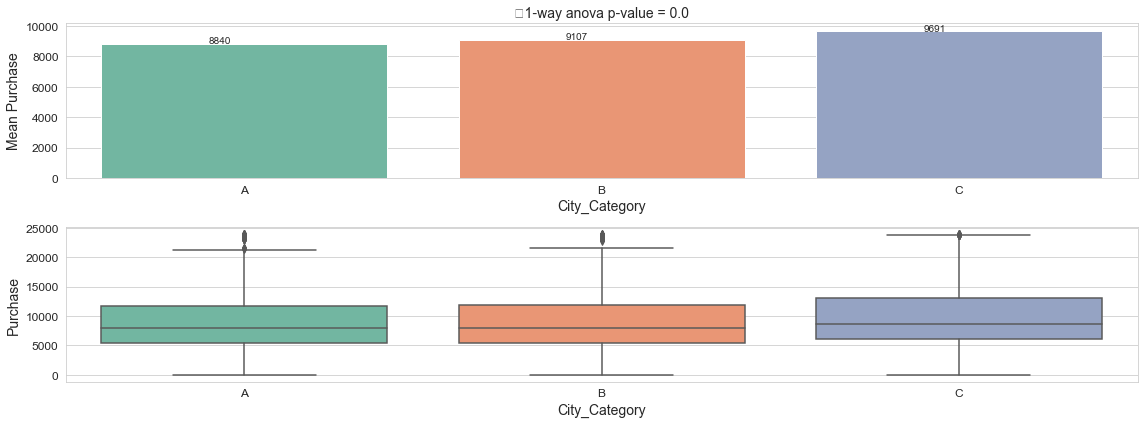

In [59]:
Bivariate_cont_cat(data, 'Purchase', 'City_Category', 'anova')

In [60]:
from statsmodels.stats.multicomp import MultiComparison as MC
mc = MC(data['Purchase'], data['City_Category'])
mc_results = mc.tukeyhsd()
print(mc_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     A      B 266.2892 0.001 142.5804 389.9979   True
     A      C 850.6417 0.001 718.7092 982.5742   True
     B      C 584.3526 0.001 465.7635 702.9416   True
-----------------------------------------------------


**Gender:**

### 1. Do males have higher purchase amount than female?

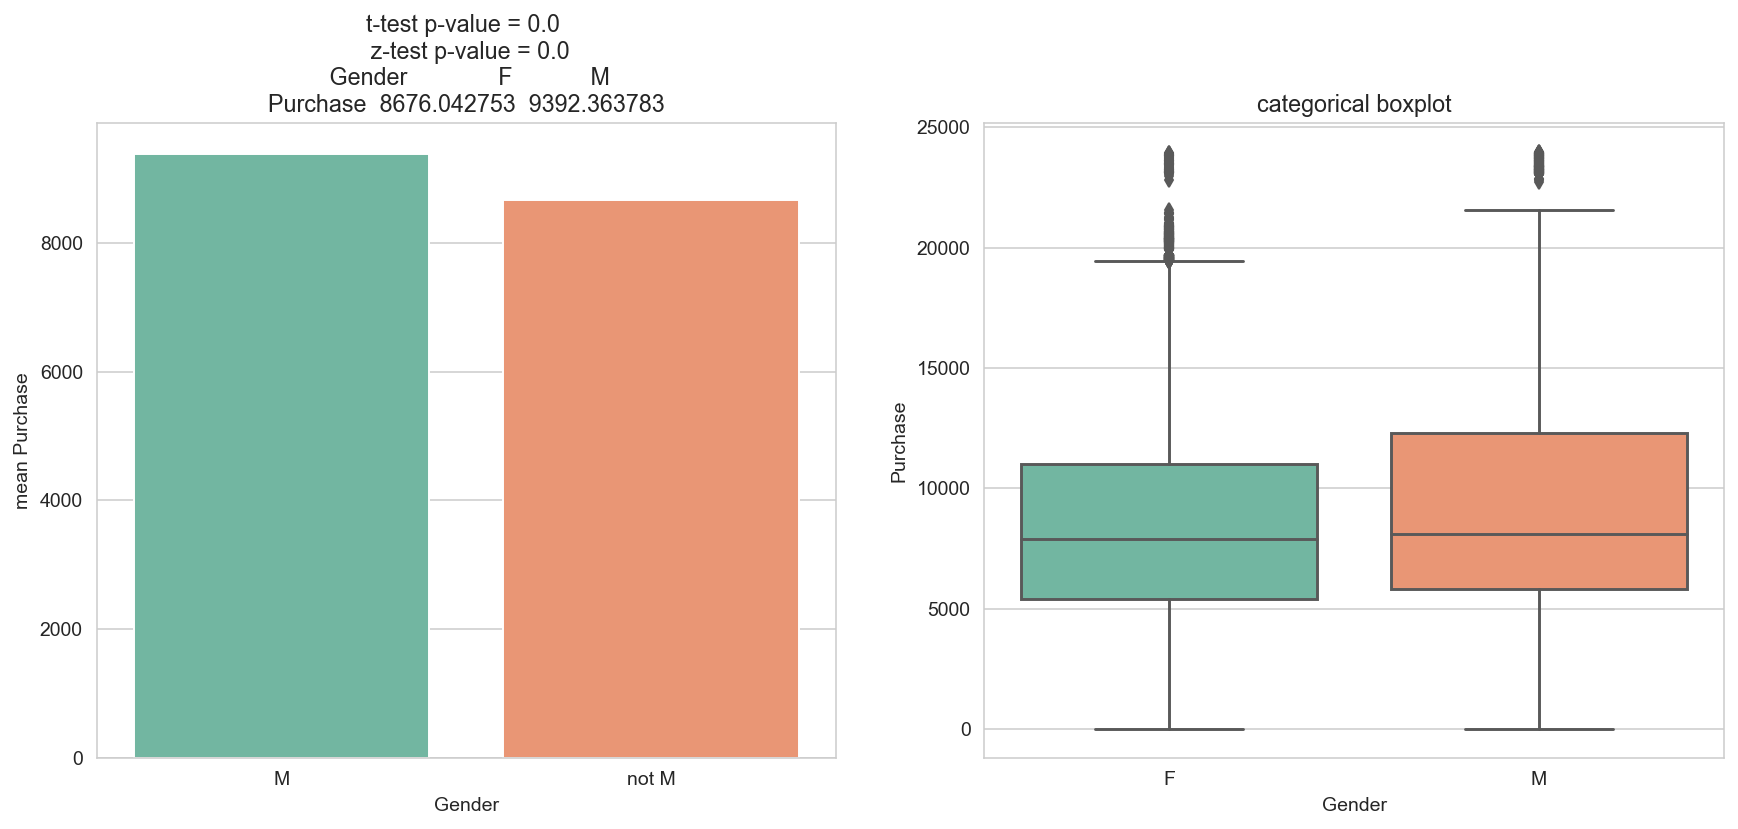

In [61]:
Bivariate_cont_cat(data, 'Purchase', 'Gender', 'z-t', 'M')

* Barplot shows Males have higher purchase amount than Females.
* Boxplot shows very similar distribution for both categories with few outliers for both females and males at upper end.
* p-value for both z-test and t-test is smaller than alpha, we can **reject the null hypothesis.**
* **We failed to reject our hypothesis.** This implies males have higher purchase amount than females.

**Conclusion: On an average, Men have 716 more purchase amount than women.** 

**Marital Status**

### 2. Do married people have higher purchase amount?

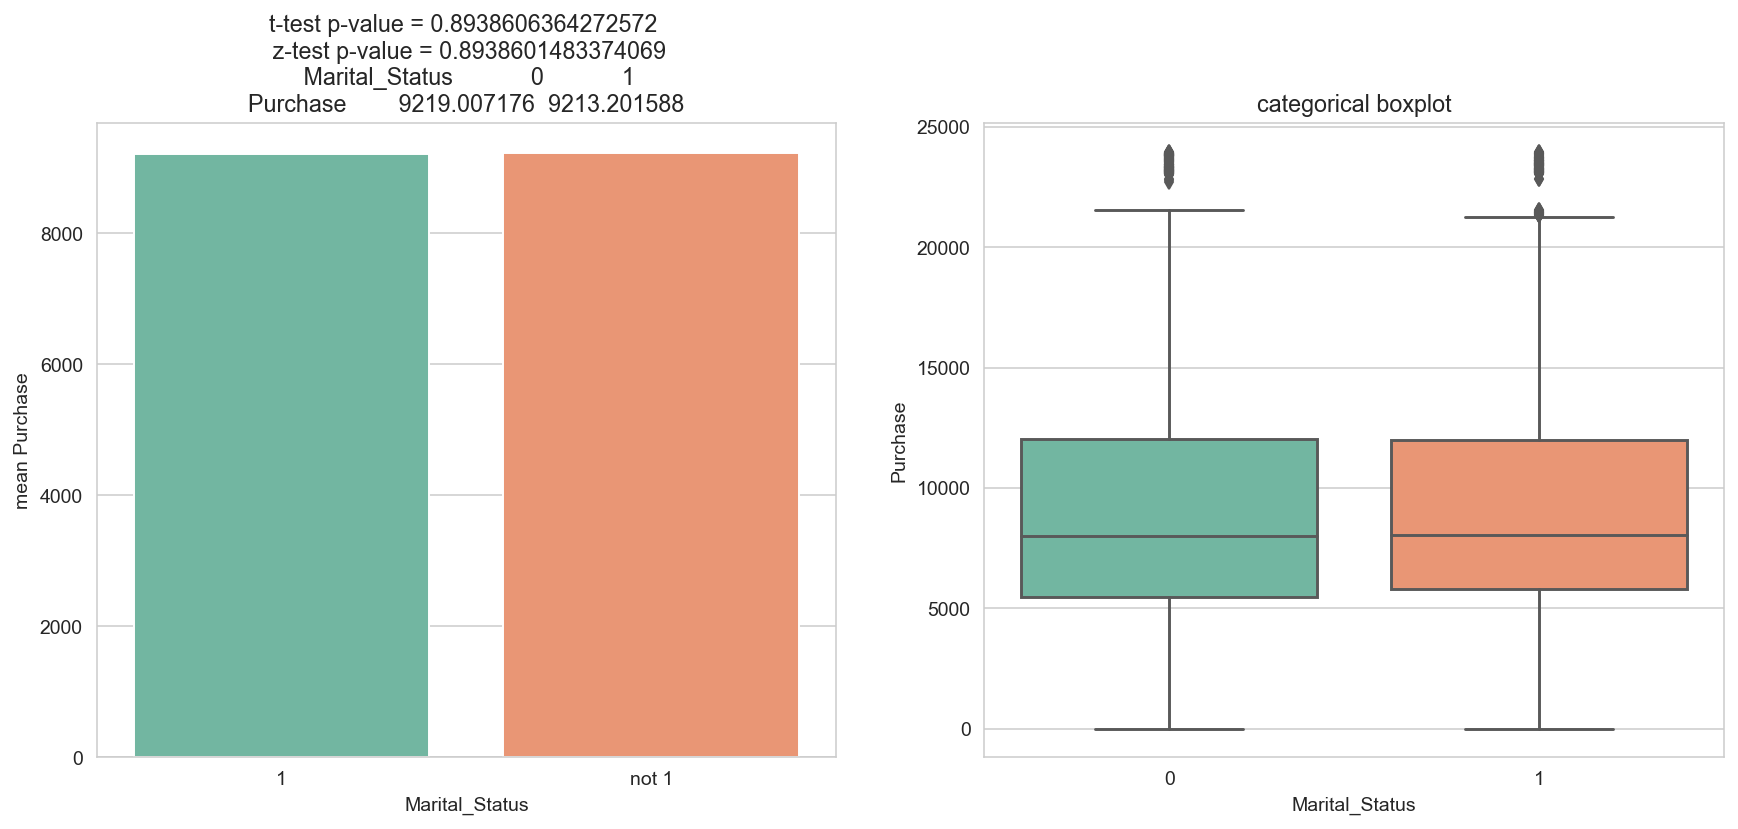

In [62]:
Bivariate_cont_cat(data, 'Purchase', 'Marital_Status', test= 'z-t', category=1)

* Barplot shows marital status 0 have a slightly higher purchase amount than marital status 1.
* Boxplot shows a similar distribution with few outliers on the upper end for both status.
* p-value for both z-test and t-test is higher than the aplha(0.05) concluding we **failed to reject null hypothesis.**
* **We reject our null hypothesis.** This implies, Married people doesn't have higher purchase amount.

**Conclusion: On an average, there is no difference between the purchase amount of marital status.** 

**City Category**

In [63]:
# Creating new dataframe for dummy variables of City Category 
City_dum = pd.get_dummies(data['City_Category'],prefix='City')
City_dum['Purchase'] = data['Purchase']
City_dum.head()

,City_A,City_B,City_C,Purchase
0,1,0,0,3051
1,1,0,0,13692
2,0,1,0,8592
3,0,0,1,2761
4,1,0,0,15918


### 3. Do people living in city A have higher purchase amount than other cities?

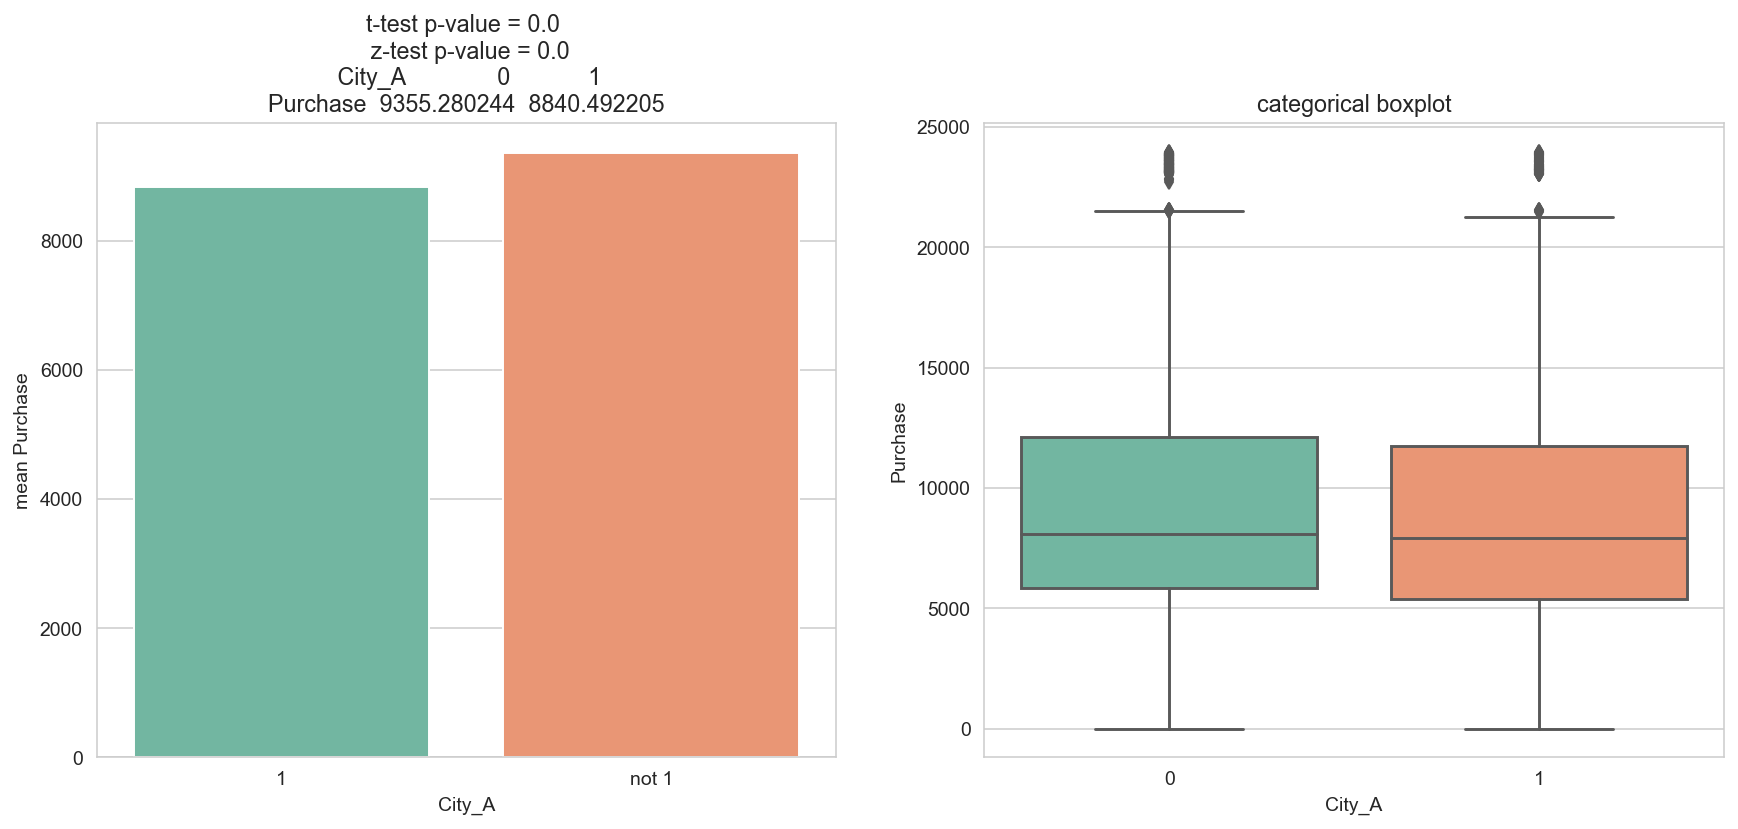

In [64]:
Bivariate_cont_cat(City_dum, 'Purchase','City_A', 'z-t', 1)

* Barplot suggests city A have lower average purchase amount than other cities.
* Boxplot shows simmilar distribution with few outliers on the upper end for city and other cities.
* p-value for both z-test and t-test is significantly smaller than p-value(0.05) concluding **we reject null hypothesis.**
* From the plots and statistical tests, **we reject out hypothesis** that City A have higher purchase amount than other cities.

**Conclusion: On an average, City A have 515 lower purchase amount than cumulative avg. other cities.**

### 4. Do people living in city B have higher purchase amount?

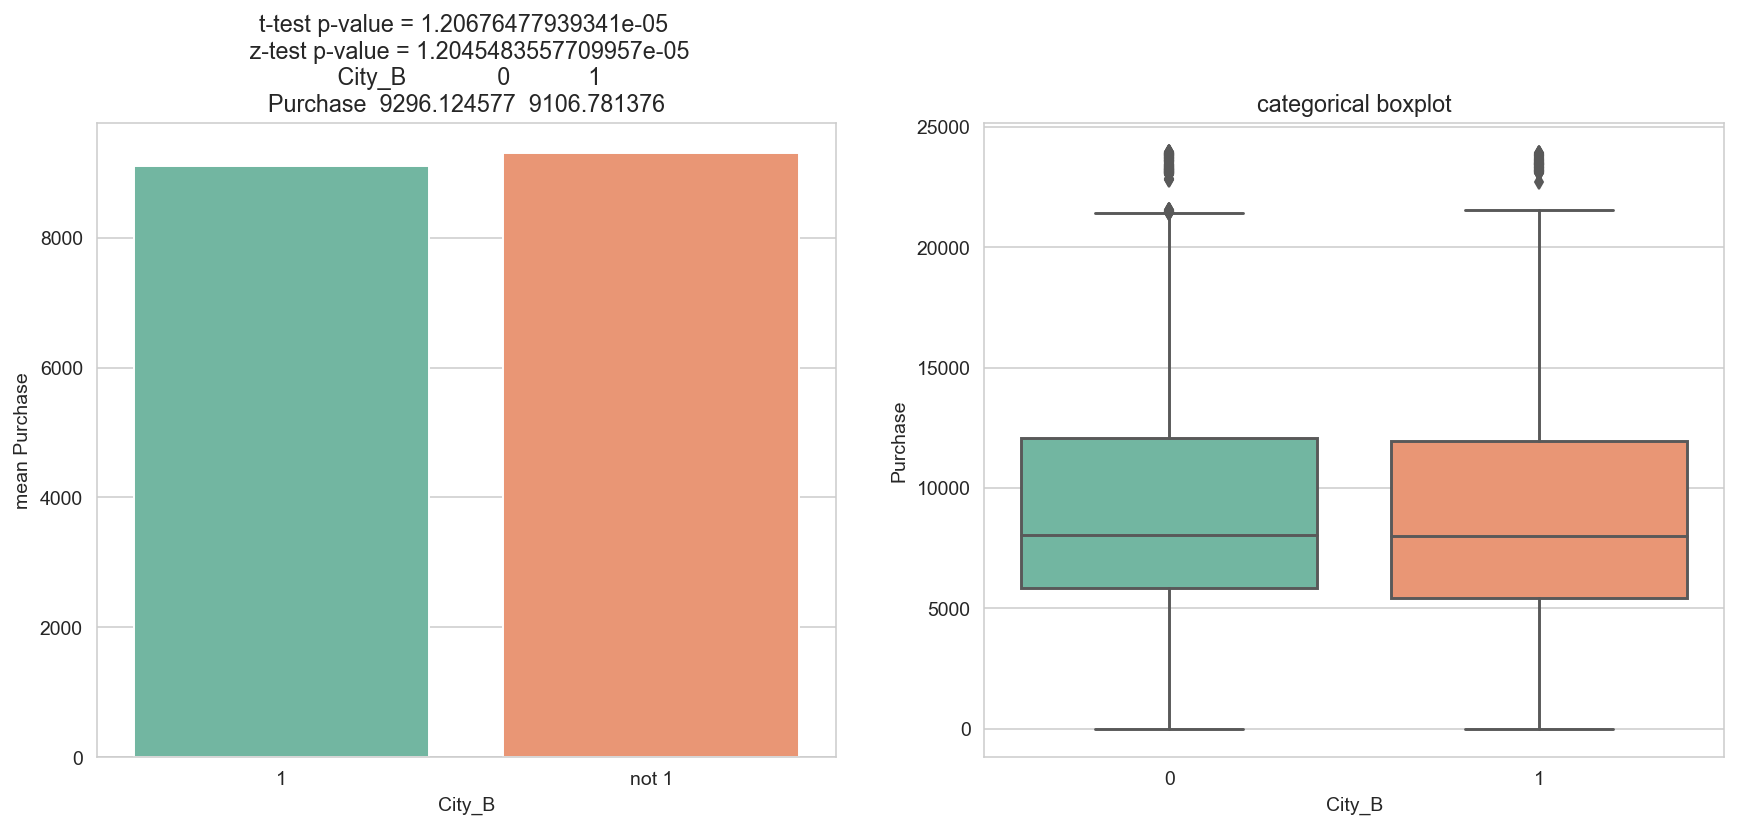

In [65]:
Bivariate_cont_cat(City_dum, 'Purchase','City_B', 'z-t', 1)

* Barplot suggests city B have lower average purchase amount than cumulative average other cities.
* Boxplot shows simmilar distribution with few outliers on the upper end for city B and other cities.
* p-value for both z-test and t-test is significantly smaller than p-value(0.05) concluding **we reject null hypothesis.**
* From the plots and statistical tests, **we reject out hypothesis** that City B have higher purchase amount than other cities.

**Conclusion: On an average, City B have 190 lower purchase amount than cumulative avg. of other cities.**

### 5. Do people living in city C have higher purchase amount?

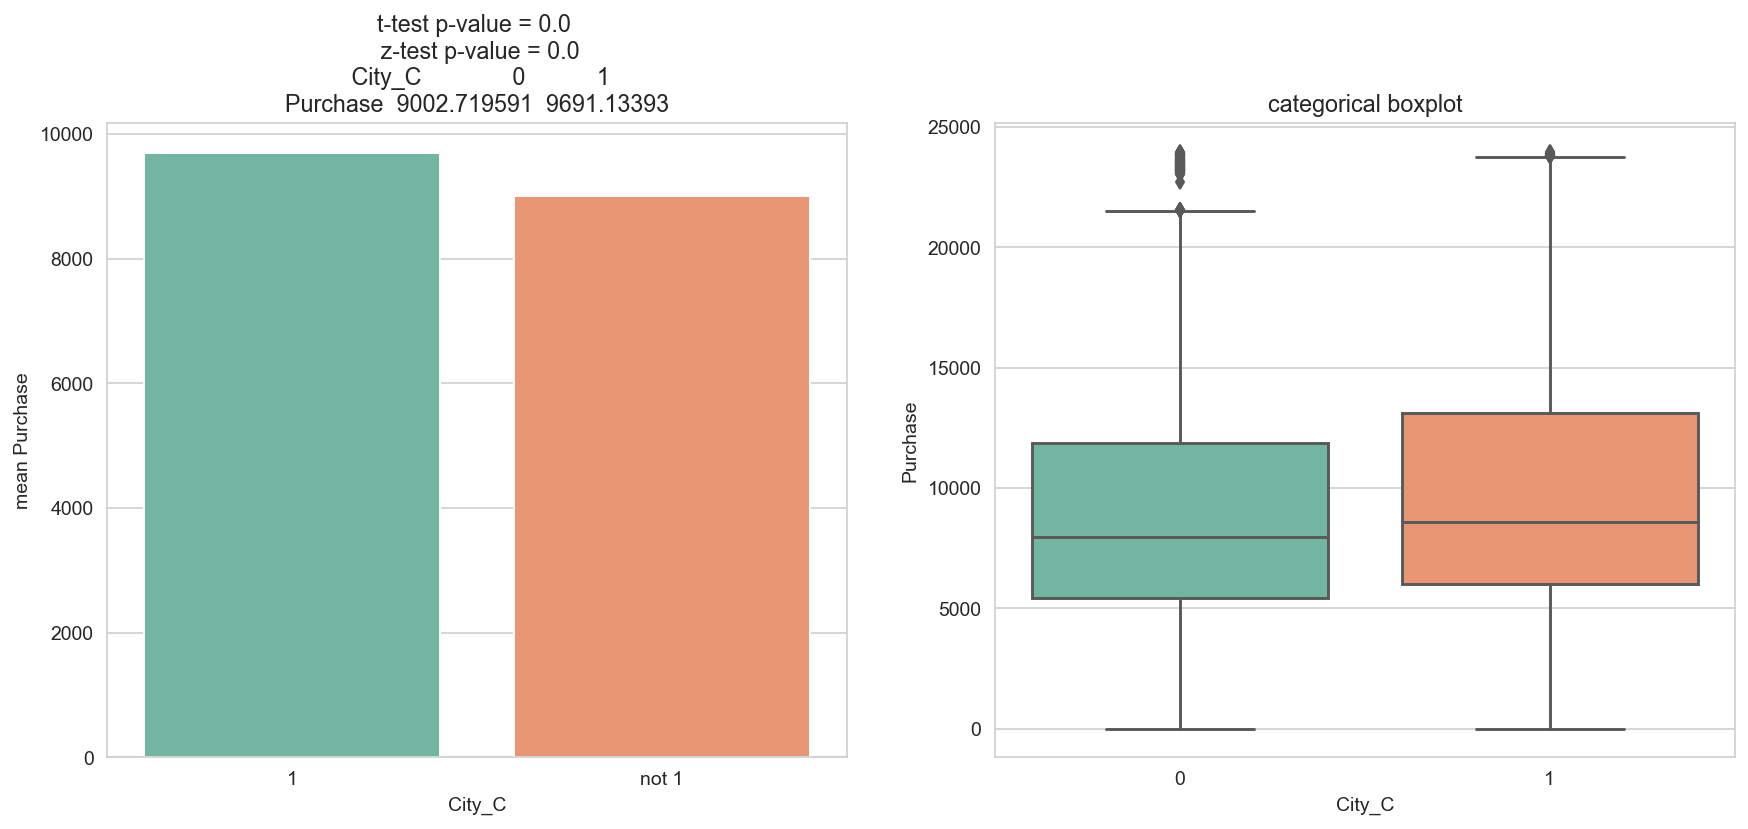

In [66]:
Bivariate_cont_cat(City_dum, 'Purchase','City_C', 'z-t', 1)

* Barplot suggests city C have higher average purchase amount than cumulative average of other cities.
* Boxplot shows simmilar distribution with few outliers on the upper end for city C and other cities.
* p-value for both z-test and t-test is significantly smaller than p-value(0.05) concluding **we reject null hypothesis.**
* From the plots and statistical tests, **we failed to reject our hypothesis** and we can say City C have higher purchase amount than other cities.

**Conclusion: On an average, People living in City C have higher purchase amount than other cities.**

**Age:**

### 6. Do different ages have different purchase amount?

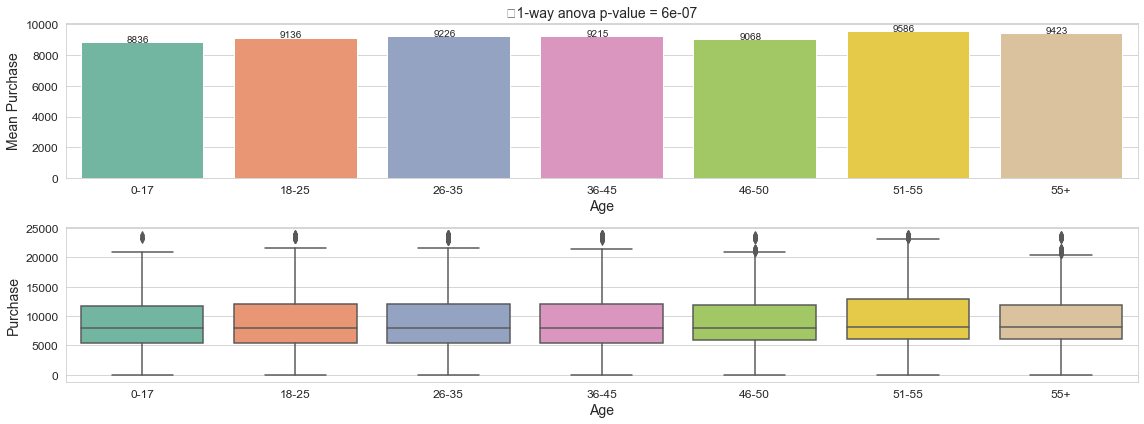

In [67]:
Bivariate_cont_cat(data, 'Purchase', 'Age', 'anova')

* Barplot suggests people ages between 0-17 have lowest avg. purchase amount and ages between 51-55 have highest avg. purchase amount.
* Boxplot shows the similar distribution throughout with few outliers at the top end for all age brackets.
* p-values for anova is 0.0528 which is slightly higher than our aplha values(0.05). 
* **We failed to reject the null hypothesis** that people from different ages will have similar avg. purchase amount.

**Conclusion: Age variable doesn't impact the avg. purchase amount significantly.**


In [68]:
from statsmodels.stats.multicomp import MultiComparison as MC
mc = MC(data['Purchase'], data['Age'])
mc_results = mc.tukeyhsd()
print(mc_results)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
  0-17  18-25   300.123 0.3278 -113.0316  713.2777  False
  0-17  26-35  390.2406 0.0592   -7.9035  788.3847  False
  0-17  36-45  379.6994 0.0915  -30.8684  790.2673  False
  0-17  46-50  232.1751 0.6913 -211.0103  675.3604  False
  0-17  51-55  749.7985  0.001  296.2068 1203.3902   True
  0-17    55+  586.9116 0.0103   84.6239 1089.1992   True
 18-25  26-35   90.1176 0.7268  -88.9171  269.1522  False
 18-25  36-45   79.5764    0.9 -125.6079  284.7608  False
 18-25  46-50  -67.9479    0.9 -332.4246  196.5288  False
 18-25  51-55  449.6755  0.001  168.1082  731.2428   True
 18-25    55+  286.7885 0.2053  -67.9332  641.5103  False
 26-35  36-45  -10.5411    0.9 -183.5226  162.4404  False
 26-35  46-50 -158.0655 0.4563 -398.4192   82.2882  False
 26-35  51-55  359.5579  0.001  100.5172  618.5987   True
 26-35    55+ 

#### Occupation:

### 7. Do people with different occupations have different purchase amount? 

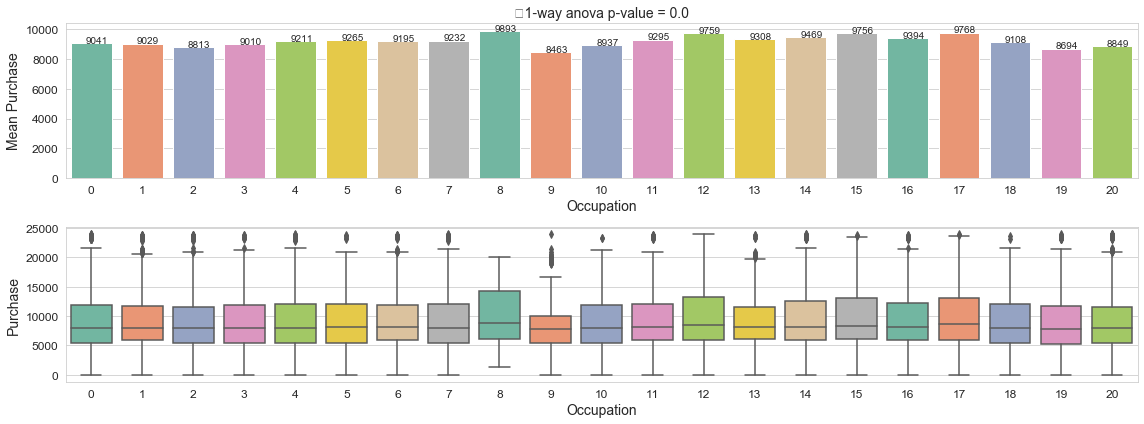

In [69]:
Bivariate_cont_cat(data, 'Purchase', 'Occupation', 'anova')

* Barplot suggests people with occupation 9 have lowest avg. purchase amount and ocupation 8 have highest avg. purchase amount.
* Boxplot shows for occupation 9 values are bit close and for occupation 8 it it a bit spread out.
* Every occupation have some outliers that the higher end.
* p-values for anova is approx. 0 which is lower than our aplha values(0.05). 
* **We reject the null hypothesis** that people from different occupations will have similar avg. purchase amount.

**Conclusion: People with different ouccuption have different avg. purchase amount.**


#### Stay_In_Current_City_Years:

### 8. Do people with different number of years stay in city will have different purchase amount?

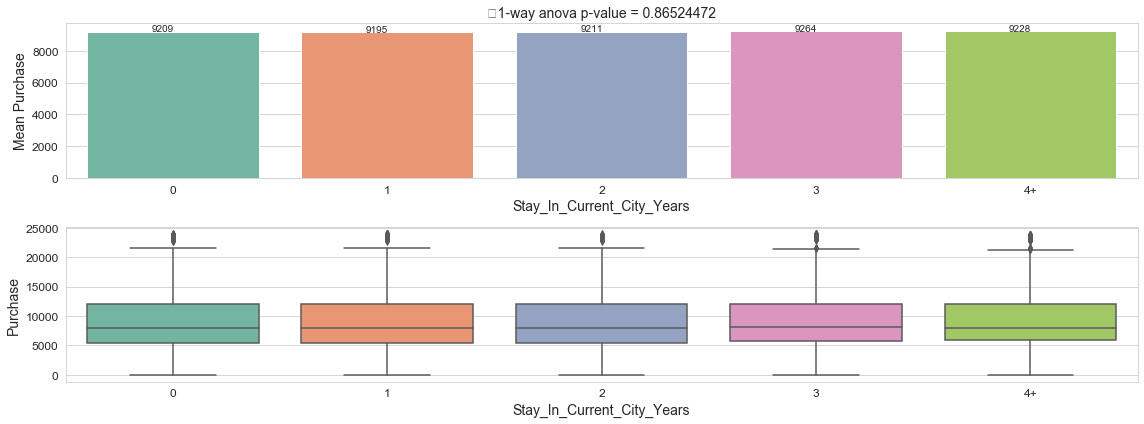

In [70]:
Bivariate_cont_cat(data, 'Purchase', 'Stay_In_Current_City_Years', 'anova')

* Barplot suggests people living in the city for 1 have lowest avg. purchase amount and people living in city for 3 years have highest avg. purchase amount.
* Boxplot shows overall similar distribution for every year stay.
* Every occupation have some outliers that the higher end.
* p-values for anova is 0.991 which is significantly higher than our aplha values(0.05). 
* **We fail to reject the null hypothesis** that people from different number of years stay in city will have similar avg. purchase amount.

**Conclusion: People with different number of years stay in city will have similar avg. Purchase amount.**


**Product_Category_1**

### 9. Do product with different category_1 have different purchase amount?

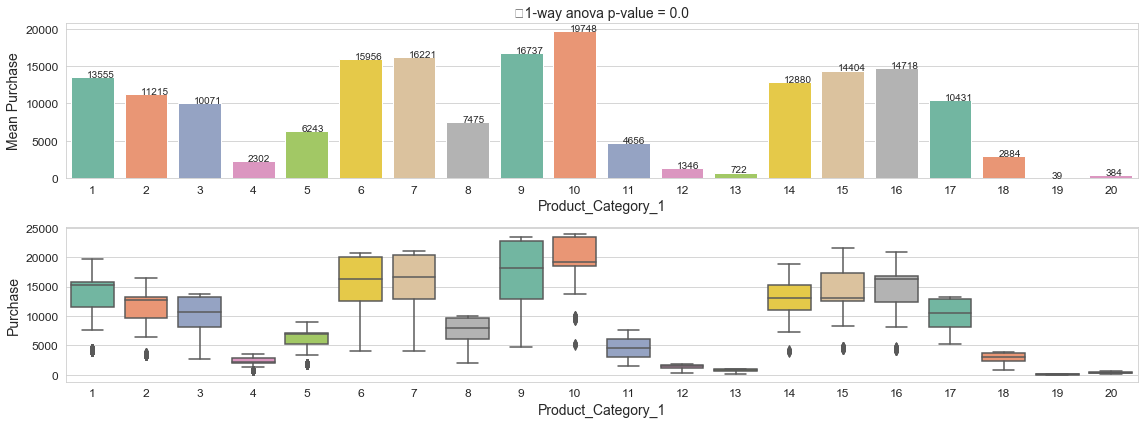

In [71]:
Bivariate_cont_cat(data, 'Purchase', 'Product_Category_1', 'anova')

In [72]:
def without_hue(plot, cat, cont):
    total = cont.sum()
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 14)
    plt.show()

Text(0, 0.5, 'Sum Purchase')

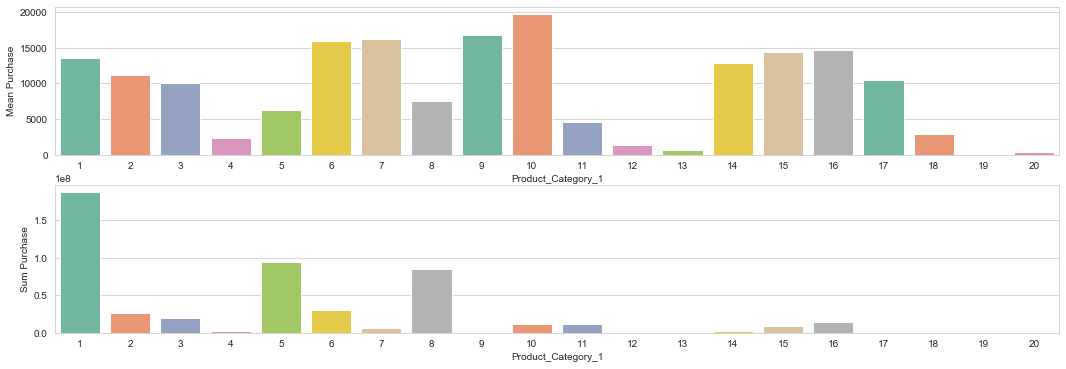

In [73]:
plt.figure(figsize=(18,6))

plt.subplot(2,1,1)
ax = sns.barplot(x='Product_Category_1',y='Purchase', data=data,ci=None, palette='Set2')
plt.ylabel('Mean Purchase')


plt.subplot(2,1,2)
ax = sns.barplot(x='Product_Category_1',y='Purchase', data=data,ci=None, estimator=sum, palette='Set2')
plt.ylabel('Sum Purchase')
#without_hue(ax, data['Product_Category_1'], data['Purchase'])

In [74]:
data['Purchase'].sum()

506978286

In [75]:
data['Purchase']

0         3051
1        13692
2         8592
3         2761
4        15918
         ...  
55002     7071
55003     6890
55004    10052
55005      943
55006    13142
Name: Purchase, Length: 55007, dtype: int64

* Barplot shows a huge difference in avg. purchase amount of different categories.
* Barplot suggests for product_category_1, category 19 have the lowest avg. purchase amount i.e 39 and category 10 have the highest avg. purchase amount i.e. 19748.
* Boxplot shows overall highly deviated plots for each of the category.
* Categories like 4, 12, 13, 19, and 20. The values lies every close to each other.
* Categories like 6, 7, and 9, the values are relatively spread out.
* Most of the categoties have some outliers that the lower end.
* p-values for anova is approx. 0 which is significantly lower than our aplha values(0.05). 
* **We reject the null hypothesis** that for product category 1 the categories have similar avg. purchase amount.

**Conclusion: Different categories in product_category_1 have different avg. purchase amount.**


#### Product_Category_2:

### 9. Do categories in product_category_2 have different purchase amount?

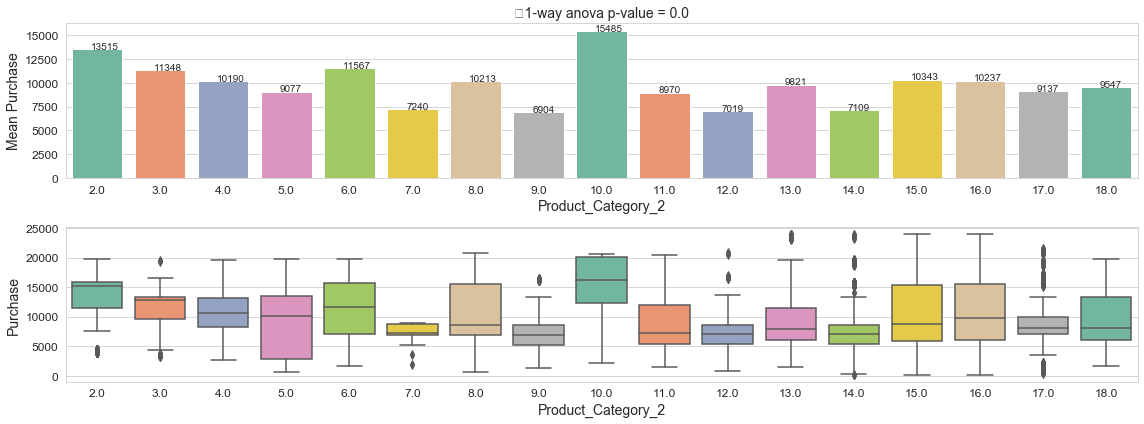

In [76]:
Bivariate_cont_cat(data, 'Purchase', 'Product_Category_2', 'anova')

* Barplot shows difference in avg. purchase amount of different categories but not a huge as for product_category_1.
* Barplot suggests for product_category_2, category 9 have the lowest avg. purchase amount i.e 6904 and category 10 have the highest avg. purchase amount i.e. 15485.
* Boxplot shows overall highly deviated plots for each of the category.
* Categories like 7, 12, 14, and 17 have values that lies every close to each other.
* Categories like 5, 6, 15 and 16 have values that are relatively spread out.
* Some of the categoties have some outliers that the lower end, some at upper end and few have at both the ends.
* p-values for anova is approx. 0 which is significantly lower than our aplha values(0.05). 
* **We reject the null hypothesis** that for product category 2 the categories have similar avg. purchase amount.

**Conclusion: Different categories in product_category_2 have different avg. purchase amount.**


#### Product_Category_3

### 10. Do categories in product_category_3 have different purchase amount?

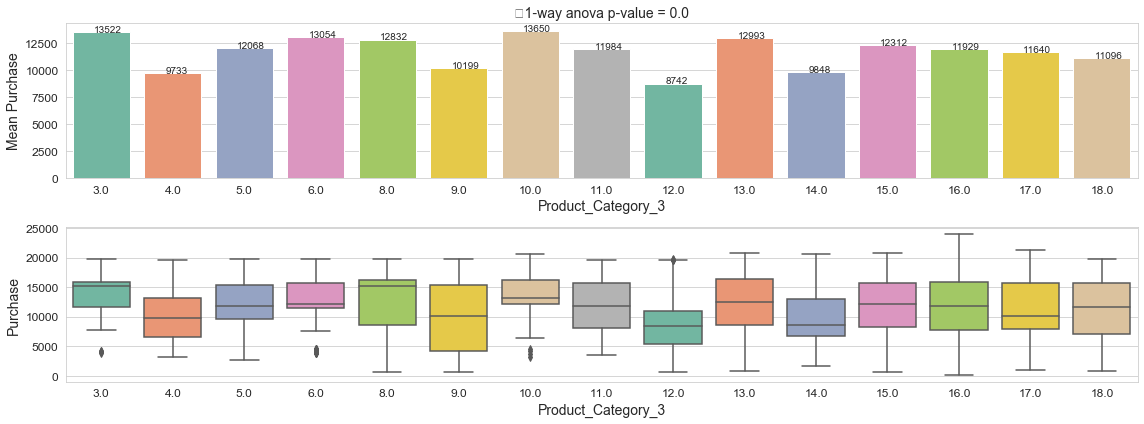

In [77]:
Bivariate_cont_cat(data, 'Purchase', 'Product_Category_3', 'anova')

* Barplot shows difference in avg. purchase amount of different categories but not a huge as for product_category_1 or product_category_2.
* Barplot suggests for product_category_3, category 12 have the lowest avg. purchase amount i.e 8742 and category 10 have the highest avg. purchase amount i.e. 13650.
* Boxplot shows overall most of the categories have simliar distributionwith a slight deviation for each category.
* Categories 9 have values that are relatively spread out.
* Few categoties have some outliers that the lower end.
* p-values for anova is approx. 0 which is significantly lower than our aplha values(0.05). 
* **We reject the null hypothesis** that for product category 3 the categories have similar avg. purchase amount.

**Conclusion: Different categories in product_category_3 have different avg. purchase amount.**


### Comparing Barplot of all Product Category variable: 

**Filling missing values in Product_Category_1 and Product_Category_2 with new category 0.**

In [78]:

data[['Product_Category_2', 'Product_Category_3']] = data[['Product_Category_2', 'Product_Category_3']].astype('float')
data['Product_Category_2'].fillna(0, inplace=True)
data['Product_Category_3'].fillna(0, inplace=True)
data[['Product_Category_1','Product_Category_2', 'Product_Category_3']] = data[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].astype('int')

In [79]:
category_1_data = data[['Product_Category_1', 'Purchase']].sort_values('Product_Category_1').reset_index(drop=True)
category_2_data = data[['Product_Category_2', 'Purchase']].sort_values('Product_Category_2').reset_index(drop=True)
category_3_data = data[['Product_Category_3', 'Purchase']].sort_values('Product_Category_3').reset_index(drop=True)

In [80]:
category_1_data = category_1_data.iloc[((category_1_data.index > 16272)&(category_1_data.index < 36551)) | (category_1_data.index > 36943)&((category_1_data.index < 54575))]
category_2_data = category_2_data.iloc[((category_2_data.index > 22285)&(category_2_data.index < 29373)) | ((category_2_data.index > 29432)&(category_2_data.index < 55007))]
category_3_data = category_3_data.iloc[(category_3_data.index > 38343)]

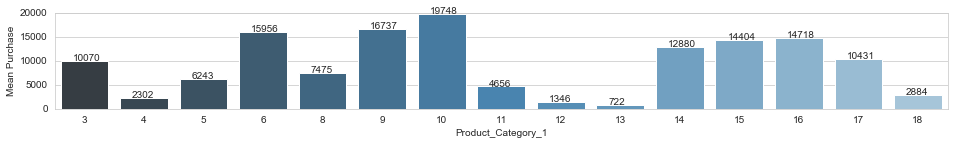

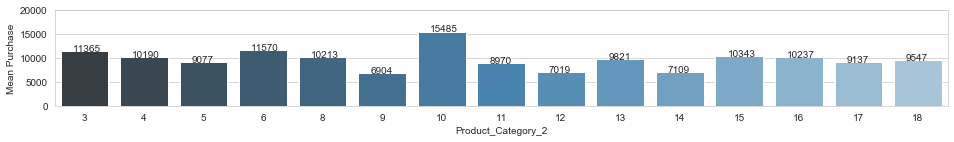

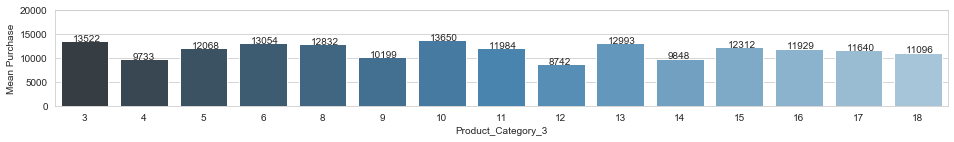

In [81]:
def Barplot_Cat(data, cat, cont):
    
    g = sns.barplot(data[cat], data[cont], ci=None, estimator=np.mean, palette='Blues_d')
    plt.ylabel('Mean {}'.format(cont), fontsize=10)
    plt.xlabel('{}'.format(cat), fontsize=10)
    plt.ylim(0,20000)
    for i in g.patches:
        g.annotate(s='{:.0f}'.format(i.get_height()), xy=(i.get_x()+0.2, i.get_height()+1))
    plt.show()


plt.figure(figsize=(16,6))
plt.subplot(3,1,1)
Barplot_Cat(category_1_data, 'Product_Category_1', 'Purchase')

plt.figure(figsize=(16,6))
plt.subplot(3,1,2)
Barplot_Cat(category_2_data, 'Product_Category_2', 'Purchase')

plt.figure(figsize=(16,6))
plt.subplot(3,1,3)
Barplot_Cat(category_3_data, 'Product_Category_3', 'Purchase')

([<matplotlib.axis.XTick at 0x253b6035348>,
 <a list of 21 Text xticklabel objects>)

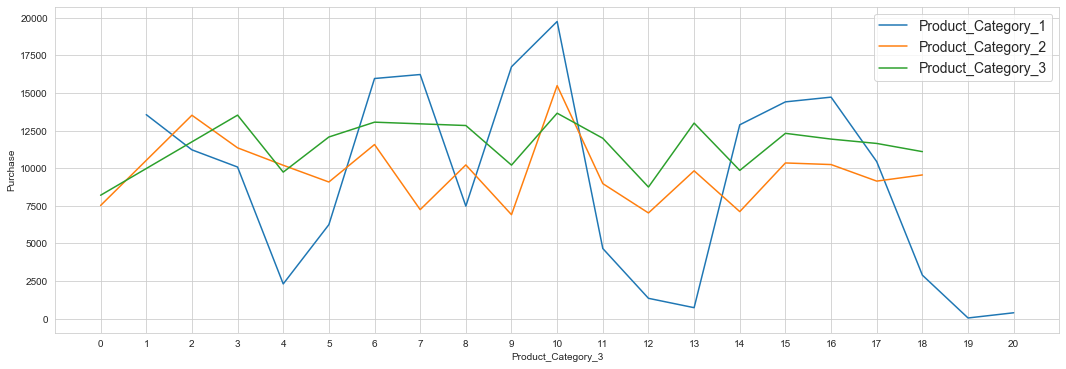

In [82]:
plt.figure(figsize=(18,6))
sns.lineplot(data['Product_Category_1'], data['Purchase'],ci=None, label='Product_Category_1')
sns.lineplot(data['Product_Category_2'], data['Purchase'],ci=None, label='Product_Category_2')
sns.lineplot(data['Product_Category_3'], data['Purchase'],ci=None, label='Product_Category_3')
plt.legend(fontsize=14)
plt.xticks(range(0,21))

### Multivariate Analysis

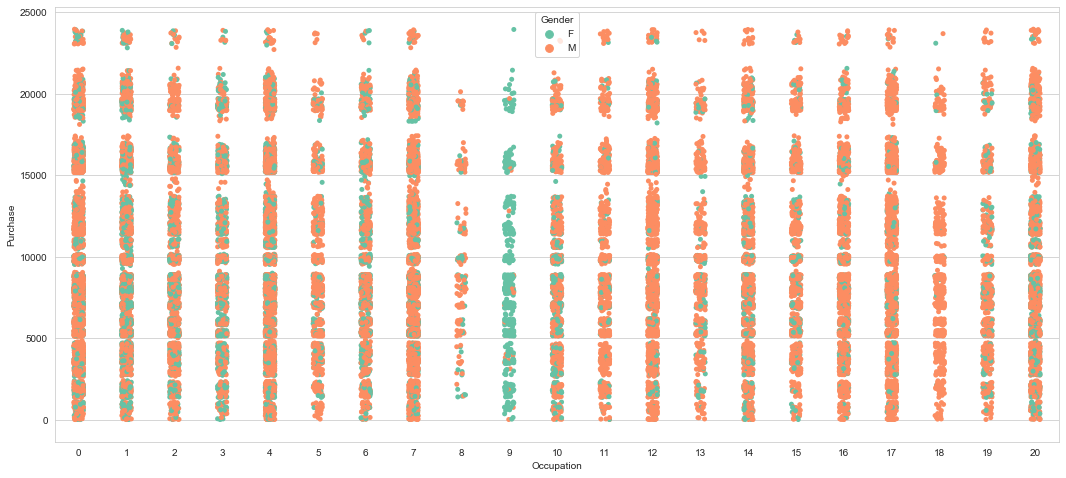

In [83]:
plt.figure(figsize=(18,8))
sns.stripplot(x='Occupation', y='Purchase', data=data, hue='Gender', palette='Set2')

* Purchase pattern is some what similar for each occupation.
* For occupation 9 is more inclined towards female.

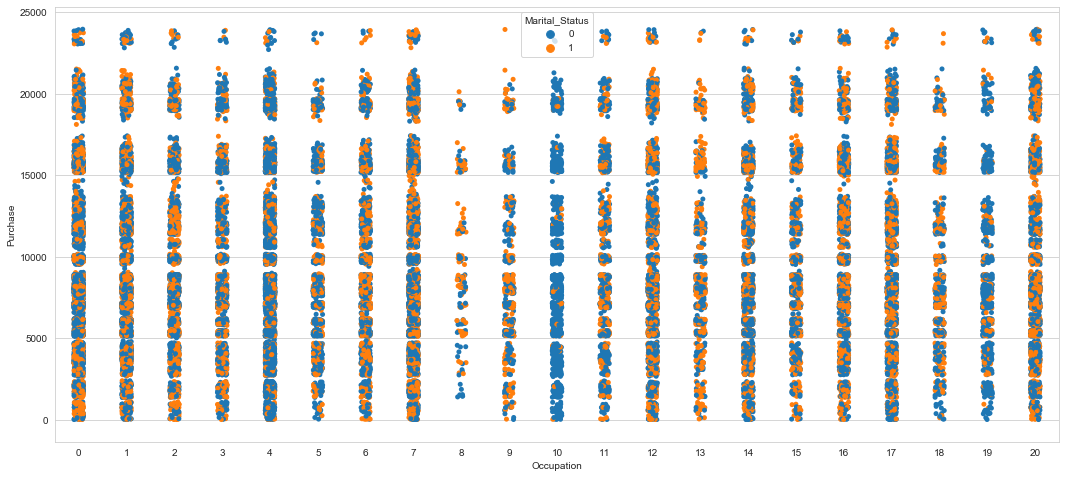

In [84]:
plt.figure(figsize=(18,8))
sns.stripplot(x='Occupation', y='Purchase', data=data, hue='Marital_Status')

* All occupations show similar trends for purchase amount.
* Occupation 10 is more inclined towards unmarried individuals.

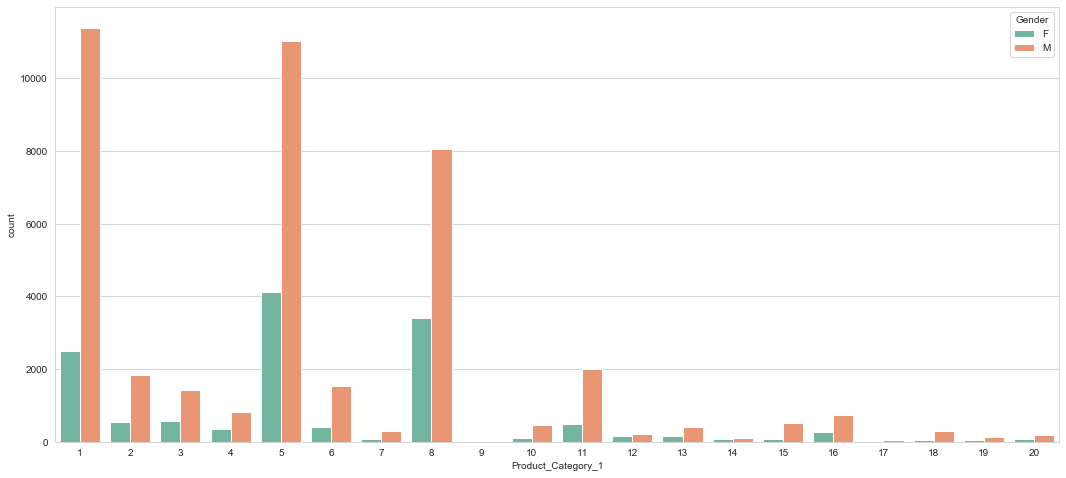

In [85]:
plt.figure(figsize=(18,8))
sns.countplot(x='Product_Category_1', hue='Gender',data=data, palette='Set2')

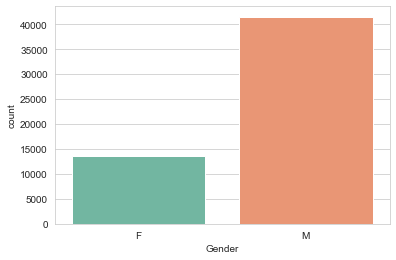

In [86]:
sns.countplot(data['Gender'], palette='Set2')

[Text(0, 0, 'Unmarried'), Text(0, 0, 'Married')]

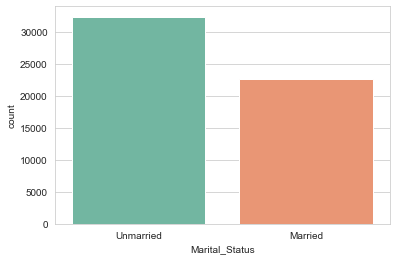

In [87]:
ax=sns.countplot(data['Marital_Status'], palette='Set2')
ax.set_xticklabels(['Unmarried', 'Married'])

[Text(0, 0, 'Unmarried'), Text(0, 0, 'Married')]

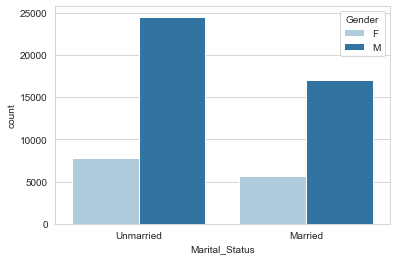

In [88]:
ax = sns.countplot(data['Marital_Status'], hue=data['Gender'], palette='Paired')
ax.set_xticklabels(['Unmarried', 'Married'])

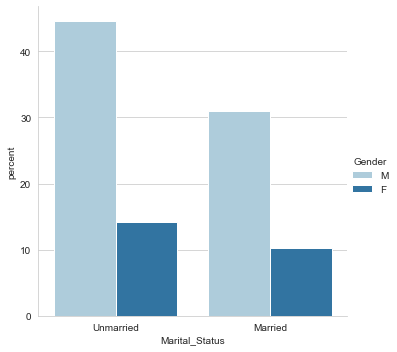

In [90]:
x='Marital_Status'
y='Gender'
df = data.groupby(x)[y].value_counts()/len(data)*100
df = df.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df, palette='Paired')
g.set_xticklabels(['Unmarried', 'Married'])
#g.ax.set_ylim(0,100)

Text(0.5, 6.799999999999994, 'Gender')

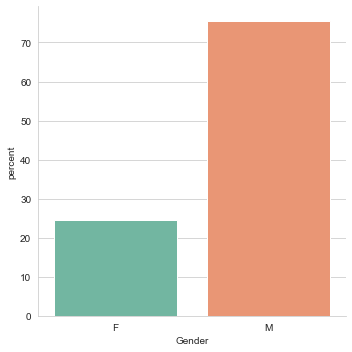

In [91]:
x ='Gender'
df = data[x].value_counts(normalize=True)
df = df.mul(100)
df = df.rename('percent').reset_index()
sns.catplot(x='index',y='percent',kind='bar',data=df, palette='Set2')
plt.xlabel('Gender')

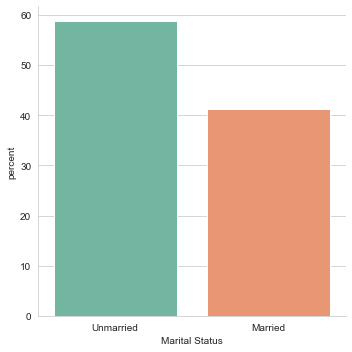

In [92]:
x ='Marital_Status'
df = data[x].value_counts(normalize=True)
df = df.mul(100)
df = df.rename('percent').reset_index()
ax = sns.catplot(x='index',y='percent',kind='bar',data=df, palette='Set2')
plt.xlabel('Marital Status')
ax.set_xticklabels(['Unmarried', 'Married'])

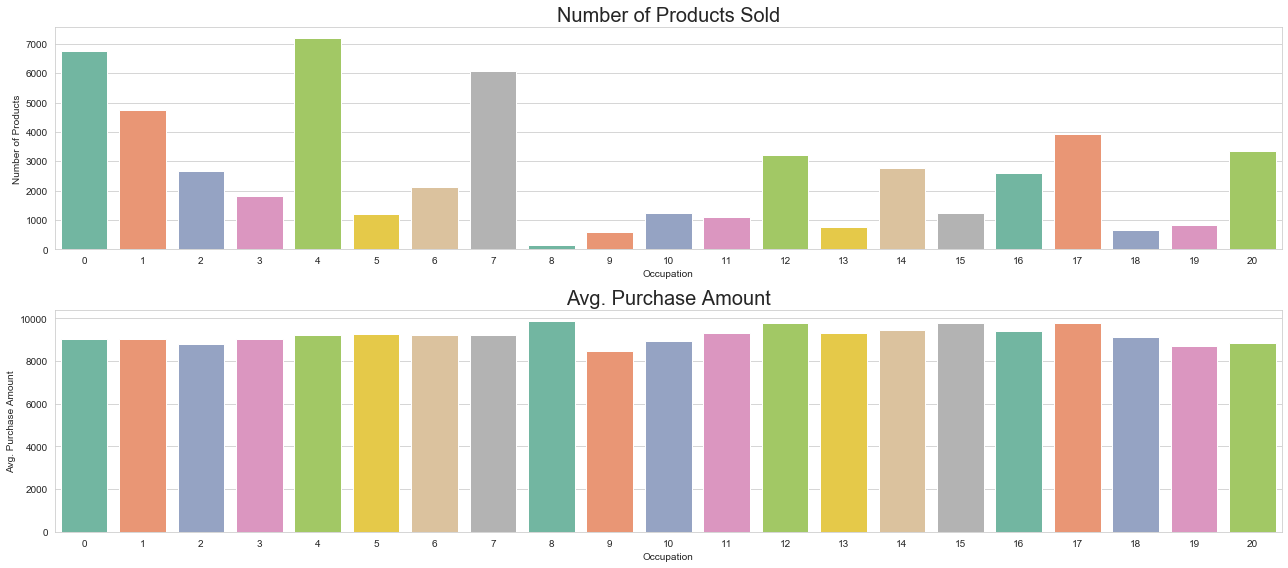

In [93]:
plt.figure(figsize=(18,8))
plt.subplot(2,1,1)
sns.countplot(data['Occupation'], palette='Set2')
plt.ylabel('Number of Products')
plt.title('Number of Products Sold', fontsize=20)
plt.subplot(2,1,2)
sns.barplot(data['Occupation'], data['Purchase'], ci=None, palette='Set2')
plt.ylabel('Avg. Purchase Amount')
plt.title('Avg. Purchase Amount', fontsize=20)
plt.tight_layout()

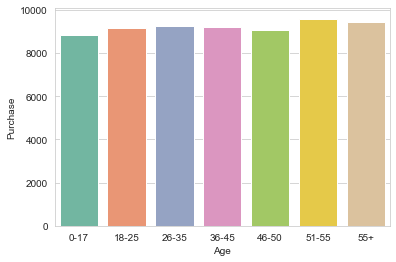

In [94]:
sns.barplot(data['Age'], data['Purchase'], ci=None, palette='Set2')

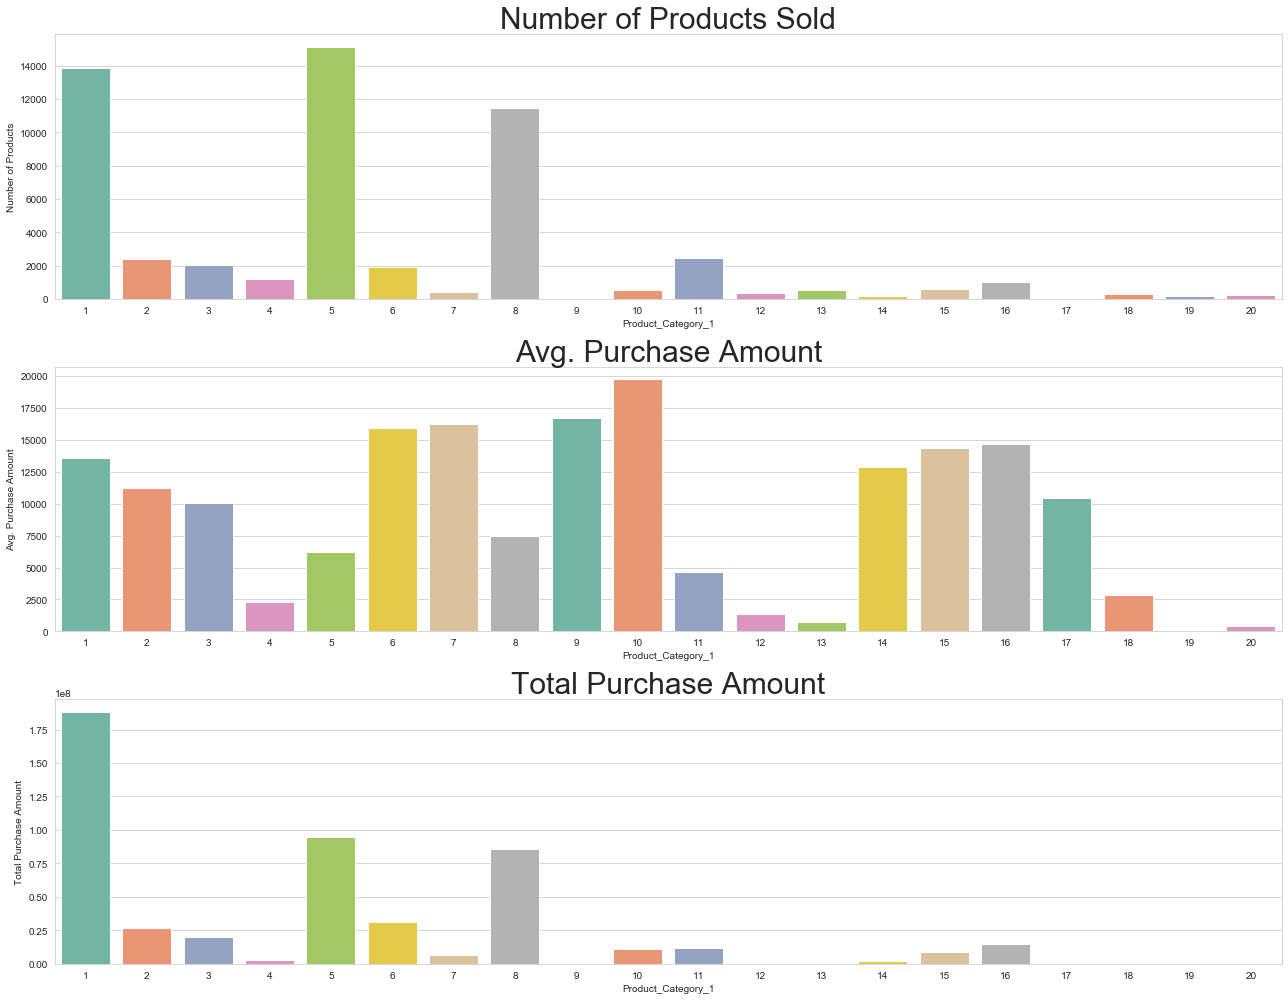

In [95]:
plt.figure(figsize=(18,14))
plt.subplot(3,1,1)
sns.countplot(data['Product_Category_1'], palette='Set2')
plt.ylabel('Number of Products')
plt.title('Number of Products Sold', fontsize=30)
plt.subplot(3,1,2)
sns.barplot(data['Product_Category_1'], data['Purchase'], ci=None, palette='Set2')
plt.ylabel('Avg. Purchase Amount')
plt.title('Avg. Purchase Amount', fontsize=30)
plt.subplot(3,1,3)
sns.barplot(data['Product_Category_1'], data['Purchase'], ci=None, palette='Set2', estimator= sum)
plt.ylabel('Total Purchase Amount')
plt.title('Total Purchase Amount', fontsize=30)
plt.tight_layout()

In [96]:
len(data)

55007

**Writing the cleaned data to csv**

In [97]:
data.to_csv('Black Friday Sales(cleaned).csv', index=False)

## Feature Engineering 

**Creating new feature Number_of_Categories:**

In [98]:
data['Number_of_Categories'] = data.apply(lambda x: 1 if ((x['Product_Category_2'] == 0) & (x['Product_Category_3'] == 0))\
                                          else (2 if (x['Product_Category_2'] !=0) & (x['Product_Category_3'] == 0) else 3), axis=1)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Number_of_Categories
0,1004808,P00278442,M,36-45,0,A,1,1,11,0,0,3051,1
1,1005841,P00350942,F,36-45,7,A,4+,1,3,4,5,13692,3
2,1000776,P00117842,F,26-35,3,B,1,0,5,13,16,8592,3
3,1001054,P00034642,M,0-17,10,C,1,0,4,5,0,2761,2
4,1000937,P00251842,M,26-35,15,A,2,1,1,15,16,15918,3


### 11. Do products under different number of categories have different purchase amount?

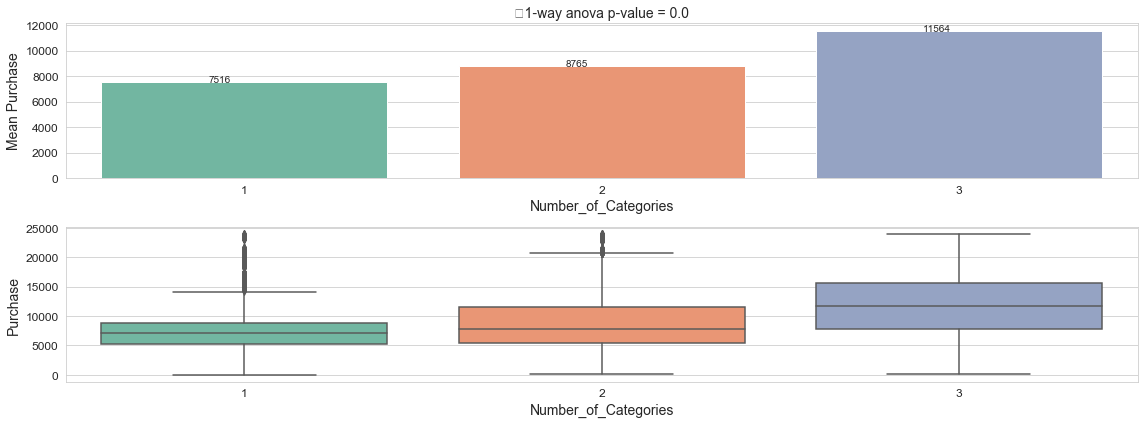

In [99]:
Bivariate_cont_cat(data, 'Purchase', 'Number_of_Categories', 'anova')

* Barplot shows significant difference in avg. purchase amount between products under different number of categories.
* Barplot suggests, products under 1 category have the lowest avg. purchase amount i.e 7516 and products under 3 categories have the highest avg. purchase amount i.e. 11564.
* Boxplot shows quiet a different distribution for each products under different categories.
* Products under 1 category have values that are relatively closer with few outliers at the top end.
* p-values for anova is approx. 0 which is significantly lower than our aplha values(0.05). 
* **We reject the null hypothesis** that for product under different number of categories have similar avg. purchase amount.

**Conclusion: Products under different number of categories have different avg. purchase amount.**


In [100]:
from statsmodels.stats.multicomp import MultiComparison as MC
mc = MC(data['Purchase'], data['Number_of_Categories'])
mc_results = mc.tukeyhsd()
print(mc_results)


  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
     1      2 1249.0436 0.001 1134.7812 1363.3059   True
     1      3 4047.8736 0.001 3927.1799 4168.5674   True
     2      3   2798.83 0.001 2683.1227 2914.5374   True
--------------------------------------------------------


### Spliting the data to test and train before performing further feature engineering

In [101]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Number_of_Categories
0,1004808,P00278442,M,36-45,0,A,1,1,11,0,0,3051,1
1,1005841,P00350942,F,36-45,7,A,4+,1,3,4,5,13692,3
2,1000776,P00117842,F,26-35,3,B,1,0,5,13,16,8592,3
3,1001054,P00034642,M,0-17,10,C,1,0,4,5,0,2761,2
4,1000937,P00251842,M,26-35,15,A,2,1,1,15,16,15918,3


In [102]:
from sklearn.utils import shuffle

#Shuffling the dataset
data1 = shuffle(data, random_state=101)

div = int(data1.shape[0]/4)

# 3 parts to train dataset and 1 part to test data
train = data1.loc[:3*div+1,:]
test = data1.loc[3*div+1:,:]

**Creating new frequency based features**

In [103]:
columns = ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
           'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
           'Product_Category_2', 'Product_Category_3']

def frequency_encoding(data):
    for i in columns:
    
        count_data = pd.DataFrame(data[i].value_counts().reset_index()).rename(columns={'index':i, i:i+'_Count'})
        data = data.merge(right= count_data, how='left', on=i, copy=False)
    return data

In [104]:
train = frequency_encoding(train)
test = frequency_encoding(test)

**Frequency Encoding for all categories**

In [105]:
def all_pcategory_encoding(data):
    category_data = pd.DataFrame(data.groupby(by=['Product_Category_1', 'Product_Category_2','Product_Category_3'])['Purchase'].\
                                 count()).reset_index().rename(columns={'Purchase':'Category_Count'})
    data = data.merge(right=category_data, how='left', on=['Product_Category_1', 'Product_Category_2', 'Product_Category_3'], copy=False)
    return data

In [106]:
train = all_pcategory_encoding(train)
test = all_pcategory_encoding(test)

**New features using desciption of the purchase amount for different variables**

In [107]:
column = ['User_ID', 'Product_ID', 'Product_Category_1','Product_Category_2', 'Product_Category_3' ]
    
def describe_features(data):    
    for i in column:
        des_col = {'mean':i+'_mean', 'min': i+'_min', '25%':i+'_25%', '50%':i+'_50%', '75%':i+'_75%', 'max':i+'_max'}
        describe_data = data.groupby(by=i)['Purchase'].describe()[['mean','min','25%','50%','75%','max']].reset_index().rename(columns=des_col)
        data = data.merge(right=describe_data, how='left', on=i, copy=False)
    return data

In [108]:
train = describe_features(train)
test = describe_features(test)

In [109]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Product_Category_2_25%,Product_Category_2_50%,Product_Category_2_75%,Product_Category_2_max,Product_Category_3_mean,Product_Category_3_min,Product_Category_3_25%,Product_Category_3_50%,Product_Category_3_75%,Product_Category_3_max
0,1003847,P00010742,M,26-35,7,B,1,0,1,8,...,6863.0,8664.5,15539.5,20686.0,11663.234388,1051.0,7810.00,10076.0,15697.0,19706.0
1,1003406,P00299142,F,26-35,7,C,4+,0,5,0,...,5237.0,7072.0,8802.0,23912.0,8211.619305,12.0,5318.00,7500.0,9881.0,23930.0
2,1000601,P00181242,F,18-25,20,B,3,1,11,0,...,5237.0,7072.0,8802.0,23912.0,8211.619305,12.0,5318.00,7500.0,9881.0,23930.0
3,1001478,P00371644,M,0-17,10,C,2,0,20,0,...,5237.0,7072.0,8802.0,23912.0,8211.619305,12.0,5318.00,7500.0,9881.0,23930.0
4,1004175,P00221442,M,36-45,0,C,1,0,1,2,...,11513.5,15227.0,15798.0,19707.0,11992.630809,2646.0,9588.25,11662.5,15283.5,19703.0


In [110]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Product_Category_2_25%,Product_Category_2_50%,Product_Category_2_75%,Product_Category_2_max,Product_Category_3_mean,Product_Category_3_min,Product_Category_3_25%,Product_Category_3_50%,Product_Category_3_75%,Product_Category_3_max
0,1004658,P00235842,M,26-35,4,B,3,1,11,15,...,5920.0,8571.0,15317.5,23941.0,11850.666667,557.0,7646.0,11841.5,15778.00,23934.0
1,1004042,P00161542,M,36-45,15,B,3,1,2,15,...,5920.0,8571.0,15317.5,23941.0,11850.666667,557.0,7646.0,11841.5,15778.00,23934.0
2,1002996,P00182142,M,18-25,0,B,1,0,1,5,...,2815.0,9923.0,13587.0,19701.0,13689.709877,3802.0,11697.0,15300.5,15709.25,19701.0
3,1005576,P00187442,M,26-35,4,C,3,0,2,4,...,8141.5,10628.0,13022.5,19158.0,12230.051565,2677.0,9724.5,11841.0,15384.00,19703.0
4,1005249,P00110942,F,46-50,14,B,1,1,1,2,...,11547.0,15222.0,15792.0,19707.0,8163.985036,12.0,5313.0,7189.0,9842.00,23960.0


**Writing the final data to csv file**

In [111]:
train.to_csv('Black Friday Sales(feature engineered) Train.csv', index=False)
test.to_csv('Black Friday Sales(feature engineered) Test.csv', index=False)

## Baseline model

In [ ]:
data.head()

### Shuffling and Creating train and test

In [ ]:
from sklearn.utils import shuffle

#Shuffling the dataset
data = shuffle(data, random_state=101)

div = int(data.shape[0]/4)

# 3 parts to train dataset and 1 part to test data
train = data.loc[:3*div+1,:]
test = data.loc[3*div+1:,:]

In [ ]:
print('train data: ',train.shape,'\ntest data: ',test.shape)

#### Train head

In [ ]:
train.head()

#### Test head

In [ ]:
test.head()

### Simple mean prediction 

Predicting the test data based on mean value of the Purchase variable of the train data.

In [ ]:
test['simple_mean'] = train['Purchase'].mean()
train['simple_mean'] = train['Purchase'].mean()

#### Evaluating error using RMSE

In [ ]:
simple_mean_eror_train = np.sqrt(MSE(train['Purchase'], train['simple_mean']))
simple_mean_eror_test = np.sqrt(MSE(test['Purchase'], test['simple_mean']))
print('RMSE for train: {}\nRMSE for test: {}'.format(simple_mean_eror_train,simple_mean_eror_test))

* We got 0.7654 error with using a base mean model.

### Mean with Gender

Predicting the test data based on mean value of the Purchase variable(grouped by gender) of the train data.

In [ ]:
gender = pd.pivot_table(train, values='Purchase', index = ['Gender'], aggfunc=np.mean)
gender

In [ ]:
# initializing new column to zero
test['Gender_mean'] = 0
train['Gender_mean'] = 0

for i in train['Gender'].unique():
  # Assign the mean value corresponding to unique entry
  test['Gender_mean'][test['Gender'] == str(i)] = train['Purchase'][train['Gender'] == str(i)].mean()
  train['Gender_mean'][train['Gender'] == str(i)] = train['Purchase'][train['Gender'] == str(i)].mean()

In [ ]:
gender_mean_eror_train = np.sqrt(MSE(train['Purchase'], train['Gender_mean']))
gender_mean_eror_test = np.sqrt(MSE(test['Purchase'], test['Gender_mean']))
print('RMSE for train: {}\nRMSE for test: {}'.format(gender_mean_eror_train,gender_mean_eror_test))

* We got 0.7646 error with using a base mean model grouped by gender which is slightly lower than mean base model.

### City

In [ ]:
city = pd.pivot_table(train, values='Purchase', index = ['City_Category'], aggfunc=np.mean)
city

In [ ]:
# initializing new column to zero
test['City_mean'] = 0
train['City_mean'] = 0

for i in train['City_Category'].unique():
  # Assign the mean value corresponding to unique entry
  test['City_mean'][test['City_Category'] == str(i)] = train['Purchase'][train['City_Category'] == str(i)].mean()
  train['City_mean'][train['City_Category'] == str(i)] = train['Purchase'][train['City_Category'] == str(i)].mean()

city_mean_eror_train = np.sqrt(MSE(train['Purchase'], train['City_mean']))
city_mean_eror_test = np.sqrt(MSE(test['Purchase'], test['City_mean']))
print('RMSE for train: {}\nRMSE for test: {}'.format(city_mean_eror_train,city_mean_eror_test))

### Mean with Product_Category_1

Predicting the test data based on mean value of the Purchase variable(grouped by Product_Category_1) of the train data.

In [ ]:
product_category_1 = pd.pivot_table(train, values='Purchase', index = ['Product_Category_1'], aggfunc=np.mean)
product_category_1.head()

In [ ]:
# initializing new column to zero
test['product_category1_mean'] = 0
train['product_category1_mean'] = 0

for i in train['Product_Category_1'].unique():
      # Assign the mean value corresponding to unique entry
    test['product_category1_mean'][test['Product_Category_1'] == i] = train['Purchase'][train['Product_Category_1'] == i].mean()
    train['product_category1_mean'][train['Product_Category_1'] == i] = train['Purchase'][train['Product_Category_1'] == i].mean()

In [ ]:
cat1_mean_error_train = np.sqrt(MSE(train['Purchase'], train['product_category1_mean']))
cat1_mean_error_test = np.sqrt(MSE(test['Purchase'], test['product_category1_mean']))
print('RMSE for train: {}\nRMSE for test: {}'.format(cat1_mean_error_train,cat1_mean_error_test))


* We got 0.3914 error with using a base mean model grouped by Product_Category_1 which is significantly lower than mean base model categorised by gender.

### Mean with Number_of_Categories:

In [ ]:
num_category = pd.pivot_table(train, values='Purchase', index = ['Number_of_Categories'], aggfunc=np.mean)
num_category.head()

In [ ]:
# initializing new column to zero
test['num_category_mean'] = 0
train['num_category_mean'] = 0

for i in train['Number_of_Categories'].unique():
      # Assign the mean value corresponding to unique entry
    test['num_category_mean'][test['Number_of_Categories'] == i] = train['Purchase'][train['Number_of_Categories'] == i].mean()
    train['num_category_mean'][train['Number_of_Categories'] == i] = train['Purchase'][train['Number_of_Categories'] == i].mean()

In [ ]:
num_cat_error_train = np.sqrt(MSE(train['Purchase'], train['num_category_mean']))
num_cat_error_test = np.sqrt(MSE(test['Purchase'], test['num_category_mean']))
print('RMSE for train: {}\nRMSE for test: {}'.format(num_cat_error_train,num_cat_error_test))

### Mean with both Product Category 1 and Number of Categories 

In [ ]:
cat1_ncat = pd.pivot_table(train, values='Purchase', index = ['Product_Category_1', 'Number_of_Categories'], aggfunc=np.mean)
cat1_ncat.head()

In [ ]:
# initializing new column to zero
test['cat1_ncat'] = 0
train['cat1_ncat'] = 0

s1= 'Product_Category_1'
s2= 'Number_of_Categories'

for i in train[s1].unique():
    for j in train[s2].unique():
          # Assign the mean value corresponding to unique entry
        test['cat1_ncat'][(test[s1] == i) & (test[s2] == j)] = train['Purchase'][(train[s1] == i) & (train[s2] == j)].mean()
        train['cat1_ncat'][(train[s1] == i) & (train[s2] == j)] = train['Purchase'][(train[s1] == i) & (train[s2] == j)].mean()

cat1_ncat_error_train = np.sqrt(MSE(train['Purchase'], train['cat1_ncat']))
#cat1_ncat_error_test = np.sqrt(MSE(test['Purchase'], test['cat1_ncat']))
print('RMSE for train: {}\nRMSE for test: {}'.format(cat1_ncat_error_train,cat1_ncat_error_test))

In [ ]:
train.columns

In [ ]:
train[['Purchase','product_category1_mean', 'cat1_ncat']].head()

In [ ]:
# initializing new column to zero
test['multi_cat'] = 0
train['multi_cat'] = 0

s1= 'Product_Category_1'
s2= 'Product_Category_2'
s3= 'Product_Category_3'
s4= 'Number_of_Categories'

for i in train[s1].unique():
    for j in train[s2].unique():
        for k in train[s3].unique():
            for l in train[s4].unique():
          # Assign the mean value corresponding to unique entry
                test['cat1_ncat'][(test[s1] == i) & (test[s2] == j) & (test[s3] == k) & (test[s4] == l)] = train['Purchase'][(train[s1] == i) & (train[s2] == j)& (train[s3] == k)& (train[s4] == l)].mean()
                train['cat1_ncat'][(train[s1] == i) & (train[s2] == j)& (train[s3] == k)& (train[s4] == l)] = train['Purchase'][(train[s1] == i) & (train[s2] == j)& (train[s3] == k)& (train[s4] == l)].mean()



In [ ]:
cat1_ncat_error_train = np.sqrt(MSE(train['Purchase'], train['cat1_ncat']))
cat1_ncat_error_test = np.sqrt(MSE(test['Purchase'], test['cat1_ncat']))
print('RMSE for train: {}\nRMSE for test: {}'.format(cat1_ncat_error_train, cat1_ncat_error_test))

In [ ]:
test['cat1_ncat'].fillna(value = 8000, inplace=True)

In [ ]:
test.isnull().sum()

**Checking corelation between each category**

### Mean with both Gender and Product_Category_1

Predicting the test data based on mean value of the Purchase variable(grouped by Product_Category_1 and gender) of the train data.

In [ ]:
gen_pro_cat_1 = pd.pivot_table(train, values='Purchase', index = ['Product_Category_1', 'Gender'], aggfunc=np.mean)
gen_pro_cat_1.head()

In [ ]:
# initializing new column to zero
test['gen_pro_cat_1'] = 0

s1= 'Product_Category_1'
s2= 'Gender'

for i in train[s1].unique():
    for j in train[s2].unique():
          # Assign the mean value corresponding to unique entry
        test['gen_pro_cat_1'][(test[s1] == i) & (test[s2] == str(j))] = train['Purchase'][(train[s1] == i) & (train[s2] == str(j))].mean()
    

In [ ]:
dual_mean_eror = np.sqrt(MSLE(test['Purchase'], test['gen_pro_cat_1']))
dual_mean_eror

In [ ]:
#Creating dataframe for errors through different methods
error_comp = pd.DataFrame({'Simple_Mean_Error': [simple_mean_eror], 'Mean_Error_Gedner': [gender_mean_eror],
                           'Mean_Error_PCategory': [category_mean_eror], 'Mean_Error_Gender_PCategory': [dual_mean_eror]})
error_comp

* We are getting least rmsle error for Mean_Error_Gender_PCategory.

In [ ]:
pd.DataFrame({'a':[1],'b':[2],'c':[3]}, index=['A'])

In [ ]:
cat_1_cat_2 = pd.pivot_table(train, values='Purchase', index = ['Product_Category_1', 'Product_Category_2'], aggfunc=np.mean)
cat_1_cat_2.head()

In [ ]:
# initializing new column to zero
test[''] = 0

s1= 'Product_Category_1'
s2= 'Product_Category_2'

for i in train[s1].unique():
    for j in train[s2].unique():
          # Assign the mean value corresponding to unique entry
        test['pro_cat_1_cat_2'][(test[s1] == i) & (test[s2] == j)] = train['Purchase'][(train[s1] == i) & (train[s2] == j)].mean()

In [ ]:
dual_mean_eror = np.sqrt(MSLE(test['Purchase'], test['pro_cat_1_cat_2']))
dual_mean_eror

In [ ]:
cat_1_cat_3 = pd.pivot_table(train, values='Purchase', index = ['Product_Category_1', 'Product_Category_3'], aggfunc=np.mean)
cat_1_cat_3.head()

In [ ]:
# initializing new column to zero
test['pro_cat_1_cat_2_cat_3'] = 0

s1= 'Product_Category_1'
s2= 'Product_Category_2'
s3= 'Product_Category_3'
s4= 'Number_of_Categories'

for i in train[s1].unique():
    for j in train[s2].unique():
        for k in train[s3].unique():
            for l in train[s4].unique():
        # Assign the mean value corresponding to unique entry
                test['pro_cat_1_cat_2_cat_3'][(test[s1] == i) & (test[s2] == j) & (test[s3] == k) & (test[s4] == l)] = train['Purchase'][(train[s1] == i) & (train[s2] == j) & (train[s3] == k) & (train[s4] == l)].mean()

In [ ]:
test[['Purchase', 'pro_cat_1_cat_2_cat_3']]

In [ ]:
error_data = pd.DataFrame({'Training error':[simple_mean_eror_train, gender_mean_eror_train,city_mean_eror_train, num_cat_error_train,cat1_mean_error_train,cat1_ncat_error_train],
                          'Testing error':[simple_mean_eror_test, gender_mean_eror_test,city_mean_eror_test, num_cat_error_test,cat1_mean_error_test,cat1_ncat_error_test]},index=['Simple Mean', 'Gender Mean','City Mean', 'Number of Categories Mean','Category 1 Mean', 'Cat1/Cat2/Cat3/No.Cat Mean'])

In [ ]:
error_data

In [ ]:
from statsmodels.stats.multicomp import MultiComparison as MC
mc = MC(data['Purchase'], data['Age'])
mc_results = mc.tukeyhsd()
print(mc_results)